# Setting out

## Import packages

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from mpl_toolkits.basemap import Basemap
from matplotlib import mlab
import geopandas as gp
import shapely
import fiona
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
import sklearn.metrics as sm


## Set a plot style

In [110]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [111]:
sns.set_style("ticks")
sns.set_context("talk")
sns.despine()

## Import data

In [112]:
if os.path.isfile("air-con-climate-data-july-7-2015.xlsx"):
    filepath = "air-con-climate-data-july-7-2015.xlsx"
    print "loading from file"
else:
    filepath = "http://data.gov.au/dataset/9cb612b2-c303-4fb1-b87b-c987baa7e26b/resource/941dcd1b-a686-4455-9609-ecf6837d786e/download/air-con-climate-data-july-7-2015.xlsx"
    print "loading from the internet"

aircon_data = pd.read_excel(filepath)
print type(aircon_data)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


In [113]:
if os.path.isfile("poaDwellings2.csv"):
    PDfilepath = "poaDwellings2.csv"
    print "loading from file"

dwelldf = pd.read_csv(PDfilepath)
print type(dwelldf)
print "done"


loading from file
<class 'pandas.core.frame.DataFrame'>
done


In [114]:
def setState (pc):
    states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return states[0]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return states[1]
    elif 3000 <= pc < 4000:
        return states[2]
    elif 4000 <= pc < 5000:
        return states[3]
    elif 5000 <= pc < 6000:
        return states[4]
    elif 6000 <= pc < 7000:
        return states[5]
    elif 7000 <= pc < 8000:
        return states[6] 
    elif 800 <= pc < 900:
        return states[7]
    else:
        pass


stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}


def setStateC (pc):
    stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
    if 200 <= pc < 300 or 2600 <= pc <= 2619 or 2900 <= pc <= 2920:
        return stateC["ACT"]
    elif 1000 <= pc <= 2599 or 2620 <= pc <=2899 or 2921 <= pc <=2999:
        return stateC["NSW"]
    elif 3000 <= pc < 4000:
        return stateC["VIC"]
    elif 4000 <= pc < 5000:
        return stateC["QLD"]
    elif 5000 <= pc < 6000:
        return stateC["SA"]
    elif 6000 <= pc < 7000:
        return stateC["WA"]
    elif 7000 <= pc < 8000:
        return stateC["TAS"] 
    elif 800 <= pc < 900:
        return stateC["NT"]




In [115]:
airdf = aircon_data

stateList = airdf["Postcode"].apply(setState)
airdf["State"] = stateList.values

colourList = airdf["Postcode"].apply(setStateC)
airdf["State colour"] = colourList.values
# print colourList


airdf.head()

# print airdf["State colour"]

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour
0,800,130.8,-12.5,1,5377,0,NT,orange
1,801,130.8,-12.5,1,5377,0,NT,orange
2,804,130.8,-12.4,1,5377,0,NT,orange
3,810,130.9,-12.4,1,5377,0,NT,orange
4,811,130.9,-12.4,1,5377,0,NT,orange


In [116]:
dwelldf["Postcode"] = dwelldf["POA"].astype(str).str[:4]
# dwelldf["Postcode"] = int(dwelldf["Postcode"])

In [117]:
dwelldf["Postcode"] = pd.to_numeric(dwelldf["Postcode"], errors='coerce')

In [118]:
airdf = airdf.merge(dwelldf, how="inner", on='Postcode')

In [119]:
airdf

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0
5,828,130.9,-12.4,1,5377,0,NT,orange,"0828, NT",391.0
6,829,130.9,-12.4,1,5377,0,NT,orange,"0829, NT",321.0
7,830,131.0,-12.5,1,5377,0,NT,orange,"0830, NT",6289.0
8,832,131.0,-12.5,1,5377,0,NT,orange,"0832, NT",3293.0
9,835,131.0,-12.5,1,5377,0,NT,orange,"0835, NT",2234.0


In [120]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()


In [121]:
airdf.head()
airdf["agHeating"] = airdf["Occupied private dwellings"] * airdf["Annual heating hours"]
airdf["agCooling"] = airdf["Occupied private dwellings"] * airdf["Annual cooling hours"]
airdf.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0,0.0,11291700.0
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0,0.0,60625675.0
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0,0.0,36477568.0
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0,0.0,40569465.0
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0,0.0,29223995.0


In [122]:


%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)



poa_shp_file_name = "POA_2016_AUST.shp"
poa_zip_file_name = "1270055003_poa_2016_aust_shape.zip"
poa_web_file_path = ("http://data.gov.au/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/"
                 "bf8b5180-fcea-44bd-bd76-af14cc4b0fe0/download/nswlocalitypolygonshp.zip")

In [123]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(poa_shp_file_name):
    print "loading from file"
else:
    if os.path.isfile(poa_zip_file_name):
        print "unzipping"
        unzip_zipfile(poa_zip_file_name)
    else:
        import requests
        print "loading from the internet"
        page = requests.get(poa_web_file_path)
        with open(poa_zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(poa_zip_file_name)

print "done"

loading from file
done


In [124]:


# %matplotlib inline
# plt.rcParams['figure.figsize'] = (20, 10)



# shp_file_name = "aust_cd66states.shp"
# zip_file_name = "nsaasr9nnd_02211a04es_geo___.zip"
# web_file_path = ("http://data.daff.gov.au/data/warehouse/nsaasr9nnd_022/nsaasr9nnd_02211a04ec_alb132.zip")

In [125]:
# # Get the data loaded. This is a bit complicated because it's online as a zip file.
# # If we don't have it right now, we need to get it and unzip it.
# if os.path.isfile(shp_file_name):
#     print "loading from file"
# else:
#     if os.path.isfile(zip_file_name):
#         print "unzipping"
#         unzip_zipfile(zip_file_name)
#     else:
#         import requests
#         print "loading from the internet"
#         page = requests.get(web_file_path)
#         with open(zip_file_name, 'wb') as z:
#             z.write(page.content)
#         unzip_zipfile(zip_file_name)

# print "done"

In [126]:


# %matplotlib inline
# plt.rcParams['figure.figsize'] = (20, 10)



# shp_file_name = "cstauscd_r.shp"
# zip_file_name = "61395_shp.zip"
# web_file_path = ("https://d28rz98at9flks.cloudfront.net/61395/61395_shp.zip")

In [127]:
# # Get the data loaded. This is a bit complicated because it's online as a zip file.
# # If we don't have it right now, we need to get it and unzip it.
# if os.path.isfile(shp_file_name):
#     print "loading from file"
# else:
#     if os.path.isfile(zip_file_name):
#         print "unzipping"
#         unzip_zipfile(zip_file_name)
#     else:
#         import requests
#         print "loading from the internet"
#         page = requests.get(web_file_path)
#         with open(zip_file_name, 'wb') as z:
#             z.write(page.content)
#         unzip_zipfile(zip_file_name)

# print "done"

In [128]:
poa = gp.GeoDataFrame.from_file(poa_shp_file_name)
poa.head()

,AREASQKM16,POA_CODE16,POA_NAME16,geometry
0,3.1734,0800,0800,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,23.7902,0810,0810,POLYGON ((130.8471142530001 -12.37754403699995...
2,35.8899,0812,0812,POLYGON ((130.8919169080001 -12.36878576699996...
3,0.6381,0815,0815,"POLYGON ((130.872398607 -12.37654838499998, 13..."
4,39.0462,0820,0820,"POLYGON ((130.834991691 -12.43006229899993, 13..."


In [129]:
# mapdf = pd.to_numeric(poa["POA_CODE16"], errors='coerce')
# airpc = pd.to_numeric(airdf["Postcode"], errors='coerce')
# works = 0
# dontworks = 0

# print type(airdf["Postcode"].loc[1])
# print type(poa["POA_CODE16"].loc[1])
# print type(poa["POA_NAME16"].loc[1])
# print type(mapdf.loc[1])
# print type(airpc.loc[1])

# for i  in airpc:
#     for j in mapdf:
#         if airpc.loc[i] == mapdf.loc[j]:
#             works += 1
#         else:
#             dontworks += 1
# print works
# print dontworks

In [130]:
poa["Postcode"] = pd.to_numeric(poa["POA_CODE16"], errors='coerce')

airdf = airdf.merge(poa, how="inner", on='Postcode')

In [131]:
# filename = "cstausmd_p.shp"
# m = gp.read_file(filename)
# m.head()

In [132]:
# poa.geometry.plot()

In [133]:
# m.geometry.plot()

In [134]:
# def GeoLookup(df1Poa, df2Poa, df1Geo, df2Geo):
#     for i in df1Poa:
#         if df1Poa[i] == df2Poa[i]:
#            df1Geo = df2Geo[i]
        
def GeoLookup(df1Poa, df2Poa,  df2Geo):
    for i in df1Poa:
        if len(df1Poa) < 4:
            df1Poa = "0"+df1Poa
        if df1Poa == df2Poa:
            return df2Geo
    

In [135]:
# # GeoLookup(aircon_data["Postcode"], poa["POA_CODE16"], aircon_data["geometry"], poa["geometry"])

# # print aircon_data.head()

# print GeoLookup(aircon_data["Postcode"][:5], poa["POA_CODE16"], poa["geometry"])

In [136]:
gp_airdf = gp.GeoDataFrame(airdf)

In [137]:
gp_airdf[gp_airdf.Postcode < 900]

gp_adf_NT = gp_airdf[gp_airdf.Postcode < 900]
gp_adf_NT.head()


# gp_airdf.geometry.plot()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling,AREASQKM16,POA_CODE16,POA_NAME16,geometry
0,800,130.8,-12.5,1,5377,0,NT,orange,"0800, NT",2100.0,0.0,11291700.0,3.1734,0800,0800,"POLYGON ((130.834539712 -12.45798405399995, 13..."
1,810,130.9,-12.4,1,5377,0,NT,orange,"0810, NT",11275.0,0.0,60625675.0,23.7902,0810,0810,POLYGON ((130.8471142530001 -12.37754403699995...
2,812,130.9,-12.4,1,5377,0,NT,orange,"0812, NT",6784.0,0.0,36477568.0,35.8899,0812,0812,POLYGON ((130.8919169080001 -12.36878576699996...
3,820,130.9,-12.4,1,5377,0,NT,orange,"0820, NT",7545.0,0.0,40569465.0,39.0462,0820,0820,"POLYGON ((130.834991691 -12.43006229899993, 13..."
4,822,129.5,-14.1,1,5377,0,NT,orange,"0822, NT",5435.0,0.0,29223995.0,150783.0188,0822,0822,(POLYGON ((130.8775887600001 -12.5574015179999...


In [138]:
gp_airdf[gp_airdf.State == "NSW"]

gp_adf_NSW = gp_airdf[gp_airdf.State == "NSW"]
gp_adf_NSW.head()


# gp_airdf.geometry.plot()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour,POA,Occupied private dwellings,agHeating,agCooling,AREASQKM16,POA_CODE16,POA_NAME16,geometry
70,2386,148.9,-30.1,8,1824,1170,NSW,lightskyblue,"2386, NSW",150.0,175500.0,273600.0,1979.4029,2386,2386,"POLYGON ((148.674098306 -30.01956424599996, 14..."
71,2388,149.0,-30.4,8,1824,1170,NSW,lightskyblue,"2388, NSW",1216.0,1422720.0,2217984.0,6699.0871,2388,2388,"POLYGON ((149.022122813 -30.32095322199996, 14..."
72,2390,149.8,-30.4,8,1824,1170,NSW,lightskyblue,"2390, NSW",3291.0,3850470.0,6002784.0,4217.1071,2390,2390,"POLYGON ((149.57103237 -30.27511399599996, 149..."
73,2397,149.7,-29.9,8,1824,1170,NSW,lightskyblue,"2397, NSW",168.0,196560.0,306432.0,1694.9079,2397,2397,"POLYGON ((149.353434007 -29.78345718199995, 14..."
74,2399,150.2,-29.4,8,1824,1170,NSW,lightskyblue,"2399, NSW",330.0,386100.0,601920.0,806.3755,2399,2399,POLYGON ((150.0408569760001 -29.46053899799995...


In [139]:
interpoa = [4825,872,2540,2540,2611,2611,3500,3585,3586,3644,3644,3707,
           2406,2540,2611,4380,4377,3691,2899,6798]
interpoa[1]

872

# Initial Tests

## H/C scatter

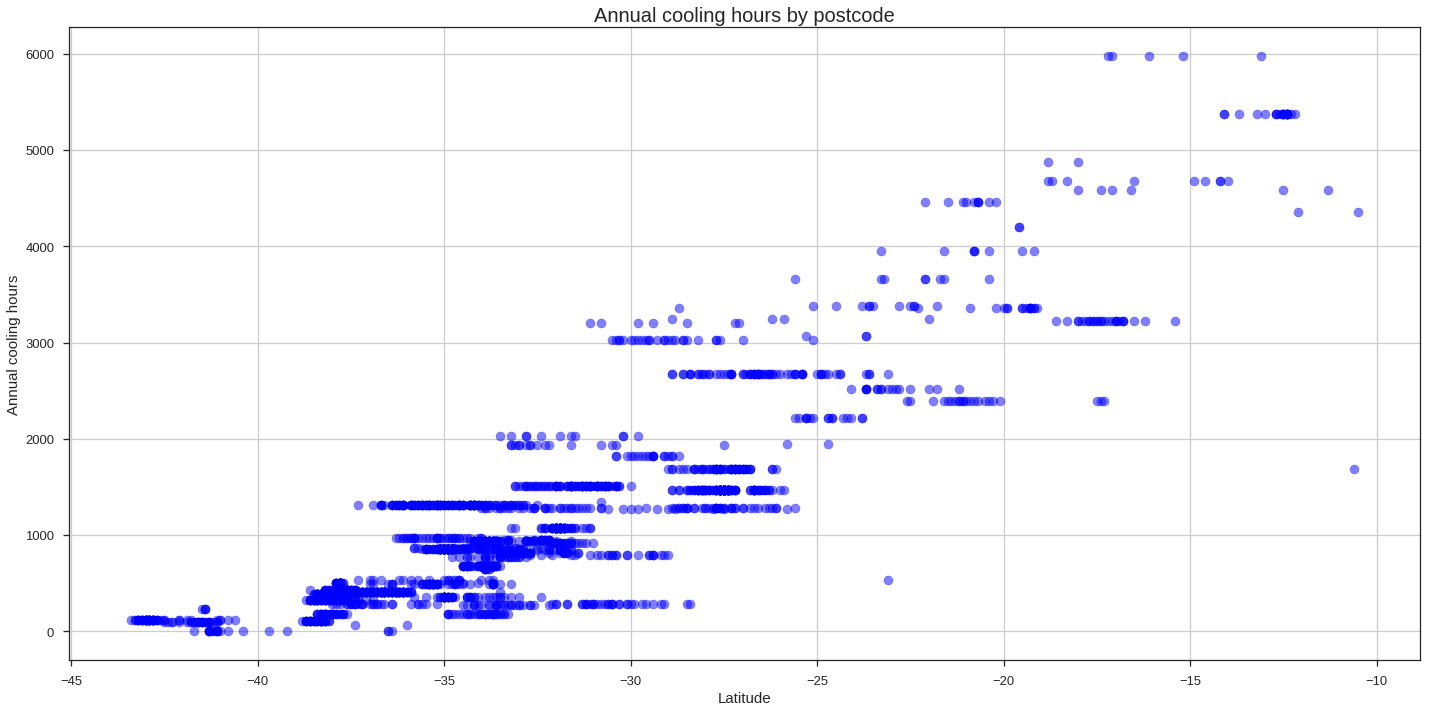

In [140]:
x=aircon_data["Latitude"]
y=aircon_data["Annual cooling hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="b", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual cooling hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


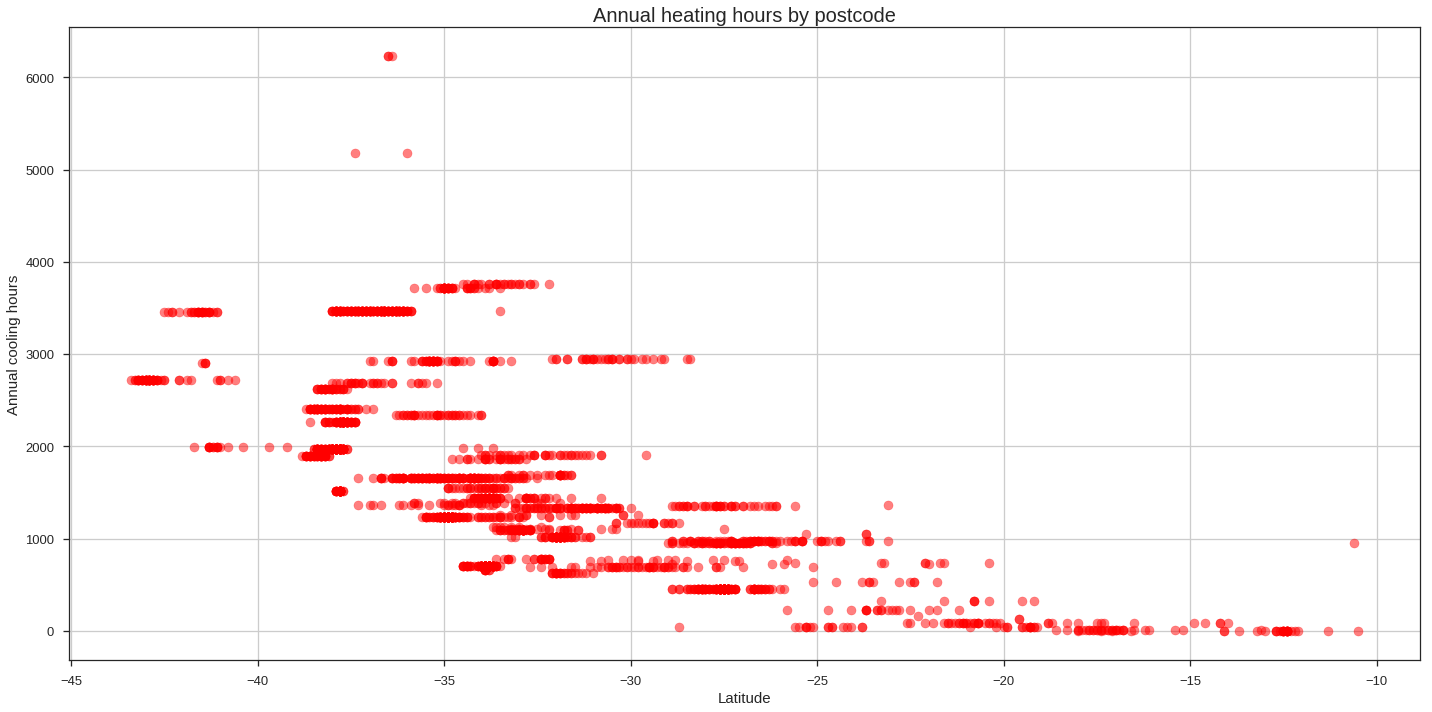

In [141]:
x=aircon_data["Latitude"]
y=aircon_data["Annual heating hours"]

fig, ax = plt.subplots()
ax.scatter(x, y , c="r", alpha=0.5)
ax.set_ylabel("Annual cooling hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()


In [1]:
count=0

In [4]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left', prop={"size":15});
fig.tight_layout()



plt.show()
plt.savefig(str(count)+'.png')


NameError: name 'plt' is not defined

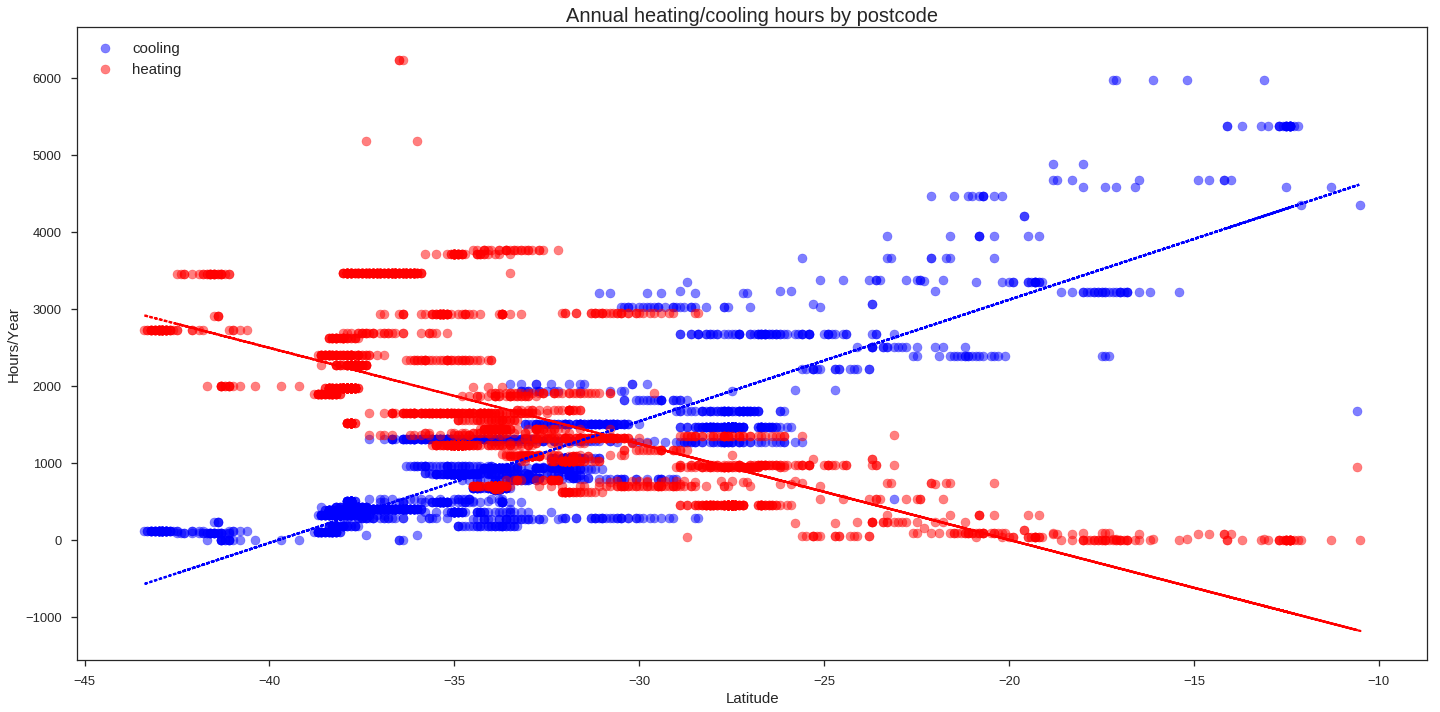

In [143]:
fig, ax = plt.subplots()
ax.scatter(aircon_data["Latitude"], aircon_data["Annual cooling hours"],  c = "blue", label = "cooling", alpha=0.5)
ax.scatter(aircon_data["Latitude"], aircon_data["Annual heating hours"],  c = "red", label = "heating", alpha=0.5)
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)
plt.legend(loc='upper left', prop={"size" : 15});

fig.tight_layout()


tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")
         



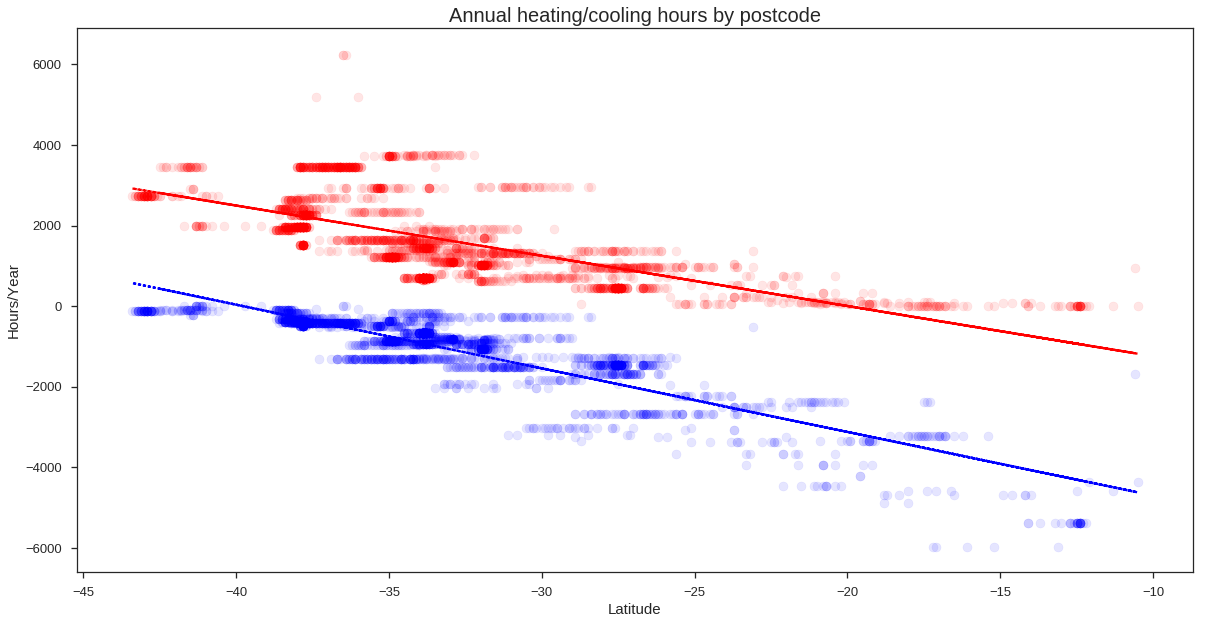

In [144]:
# Y = np.arange(len(aircon_data["Latitude"]))

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.scatter(y, -aircon_data["Annual cooling hours"],  color = 'b', alpha=0.1)
plt.scatter(y, aircon_data["Annual heating hours"], color = 'r', alpha=0.1)

tC = np.polyfit(aircon_data["Latitude"], aircon_data["Annual cooling hours"], 1)
pC = np.poly1d(-tC)
plt.plot(aircon_data["Latitude"],pC(aircon_data["Latitude"]),"b:")

tH = np.polyfit(aircon_data["Latitude"], aircon_data["Annual heating hours"], 1)
pH = np.poly1d(tH)
plt.plot(aircon_data["Latitude"],pH(aircon_data["Latitude"]), "r:")

plt.show()

## Barcharts

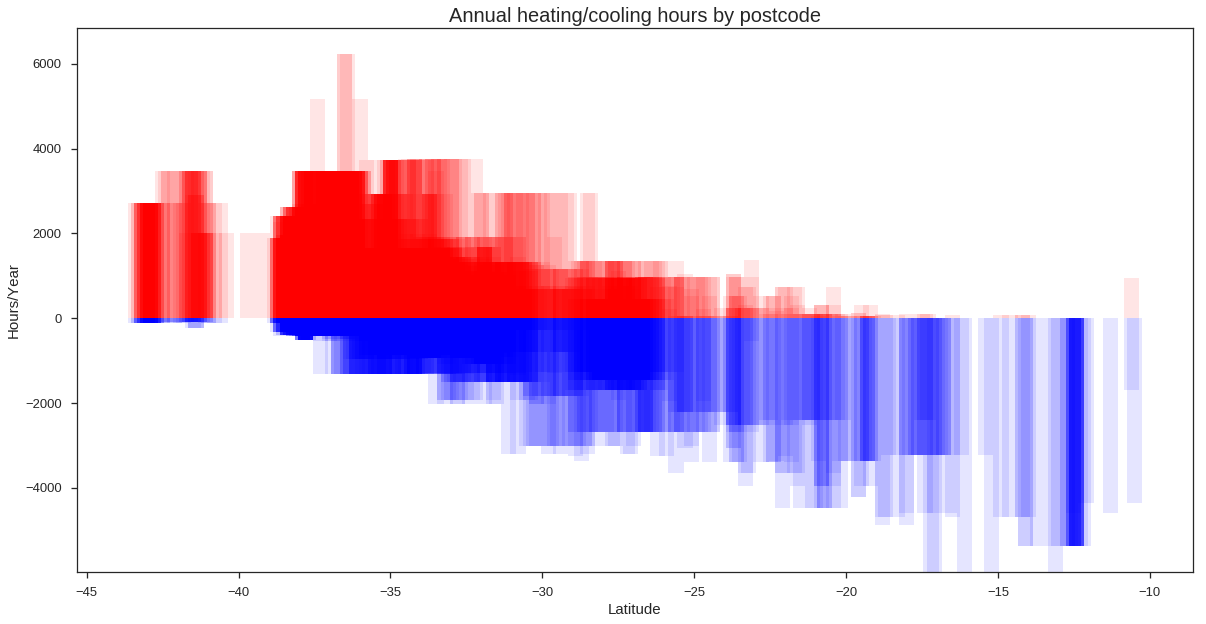

In [145]:
# Y = np.arange(len(aircon_data["Latitude"]))

fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.bar(y, -aircon_data["Annual cooling hours"],  color = 'b', width = 0.5, alpha=0.1)
plt.bar(y, aircon_data["Annual heating hours"], color = 'r', width = 0.5, alpha=0.1)
plt.show()

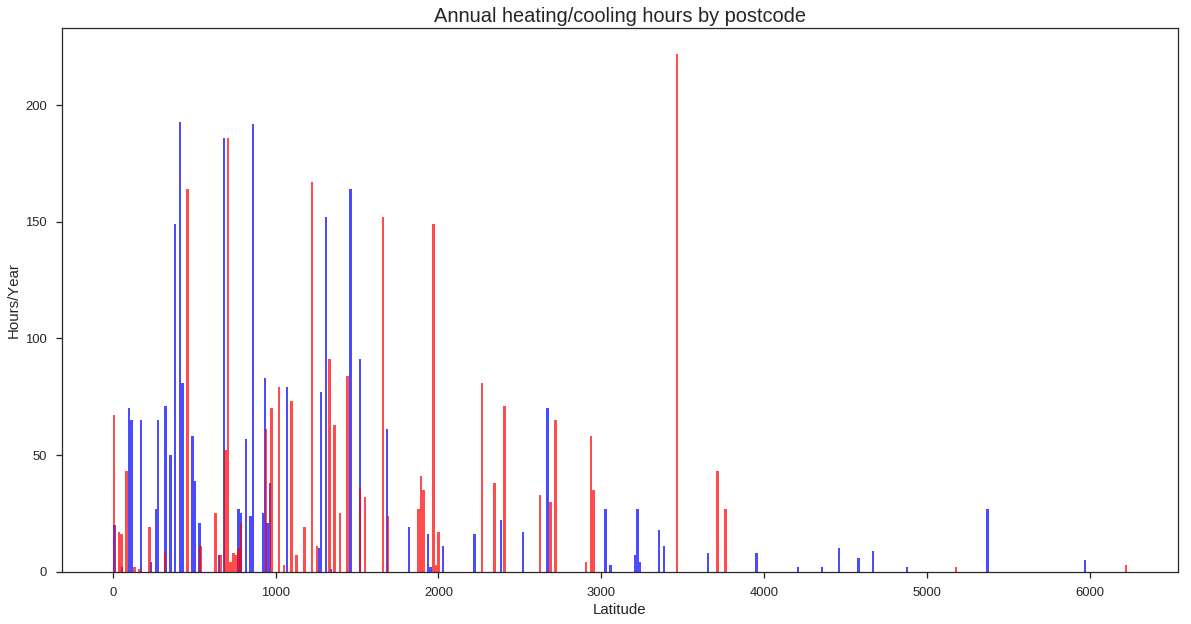

In [146]:
fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)

y = aircon_data["Latitude"]

plt.hist( aircon_data["Annual cooling hours"], bins =400,  color = 'b', alpha=0.7)
plt.hist( aircon_data["Annual heating hours"], bins = 400, color = 'r', alpha=0.7)
plt.show()

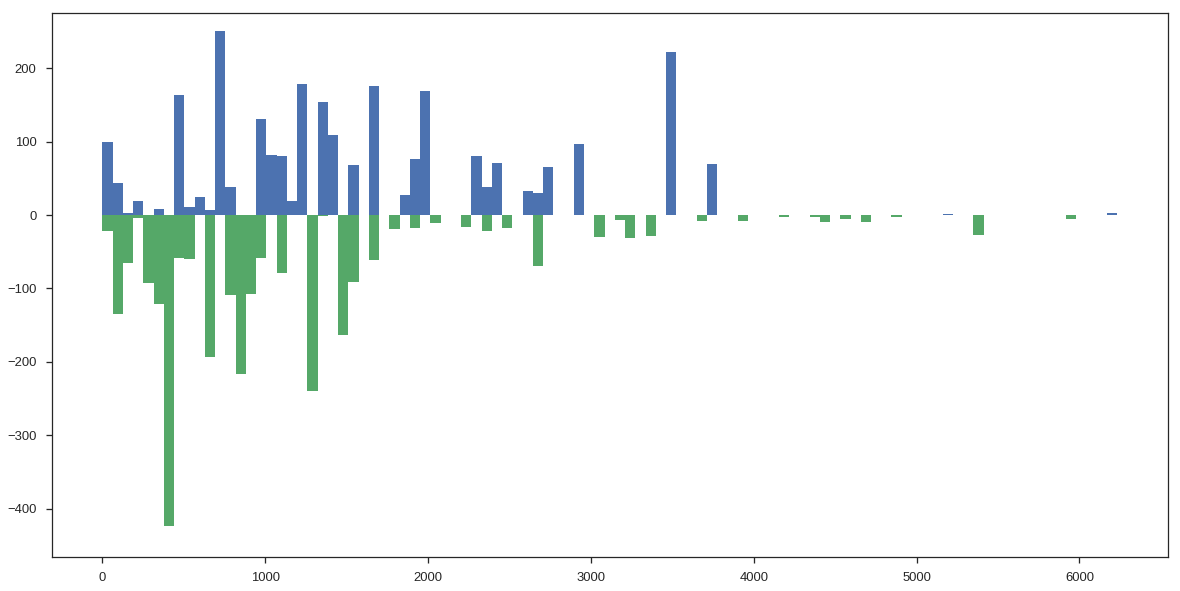

In [147]:
import scipy
from pylab import figure

def bihist(y1, y2, nbins=10, h=None):
        '''
        Bihistogram.
        h is an axis handle. If not present, a new figure is created.
        '''
        if h is None: h = figure().add_subplot(111)
        xmin = scipy.floor(scipy.minimum(y1.min(), y2.min()))
        xmax = scipy.ceil(scipy.maximum(y1.max(), y2.max()))
        bins = scipy.linspace(xmin, xmax, nbins)
        n1, bins1, patch1 = h.hist(y1, bins)
        n2, bins2, patch2 = h.hist(y2, bins)
        # set ymax:
        ymax = 0
        for i in patch1:
                height = i.get_height()
                if height > ymax: ymax = height
        # invert second histogram and set ymin:
        ymin = 0
        for i in patch2:
                height = i.get_height()
                height = -height
                i.set_height(height)
                if height < ymin: ymin = height
        h.set_ylim(ymin*1.1, ymax*1.1)          
        h.figure.canvas.draw()

bihist(aircon_data["Annual heating hours"], aircon_data["Annual cooling hours"], nbins = 100) 

In [148]:
# Y = np.arange(len(aircon_data["Latitude"]))
sorted_aircon = aircon_data.sort_values("Latitude", axis = 0, ascending = True)
sorted_aircon.head()

,Postcode,Longitude,Latitude,NatHERS Climate zone,Annual cooling hours,Annual heating hours,State,State colour
1045,7150,147.1,-43.4,26,113,2723,TAS,g
1040,7112,147.1,-43.3,26,113,2723,TAS,g
1043,7117,147.0,-43.3,26,113,2723,TAS,g
1039,7109,146.5,-43.2,26,113,2723,TAS,g
1042,7116,146.9,-43.2,26,113,2723,TAS,g


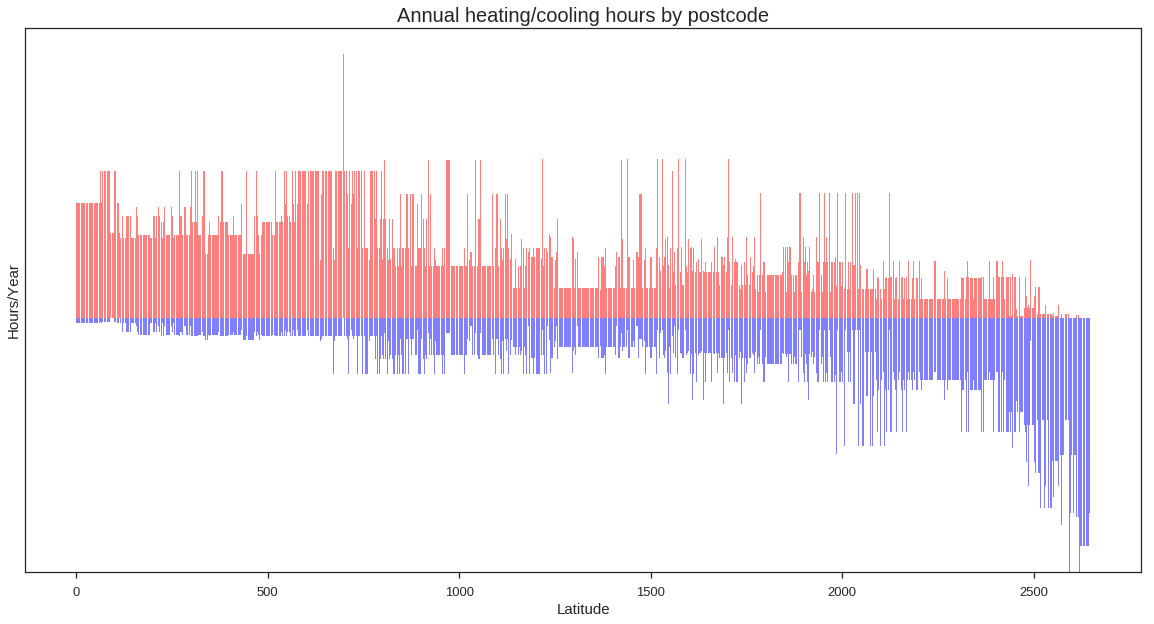

In [149]:
fig, ax = plt.subplots()
ax.set_ylabel("Hours/Year", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating/cooling hours by postcode', fontsize=20)


x = sorted_aircon["Latitude"]


maxH = max(sorted_aircon["Annual heating hours"])
maxC = max(sorted_aircon["Annual cooling hours"])

yLabels = [maxC, "0", maxH]
yPos = [-maxC, "0", maxH]

xPos = np.arange(len(x))
xPos = [i for i in xPos]
# xPos10 = len(x)/10
# xLabels = sorted_aircon["Latitude"][xPos10]
# xPos10 = np.arange(xPos10)



# xLabels = map(sorted_aircon["Latitude"]()

# x = [i for i in aircon_data["Latitude"]]
# x = [i for i in range(len(y))]
# x = [i for i in range(len(y))]

plt.yticks(yPos, yLabels)
# plt.xticks(xPos10, xLabels)
plt.bar(xPos, -sorted_aircon["Annual cooling hours"],  color = 'b', alpha=0.5)
plt.bar(xPos, sorted_aircon["Annual heating hours"], color = 'r', alpha=0.5)
plt.show()

## 3D tests

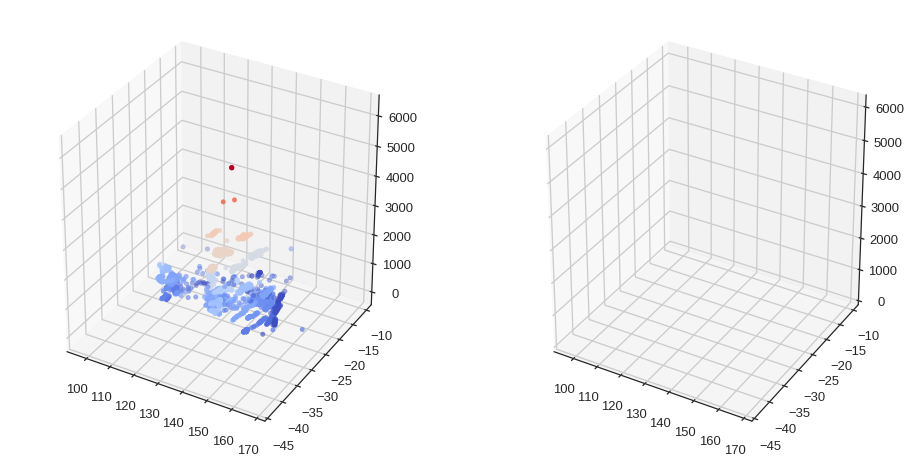

In [150]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = aircon_data["Longitude"]
Y = aircon_data["Latitude"]
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
Z = aircon_data["Annual heating hours"]
# Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)
# X,Y = np.meshgrid(bx,by)
# surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
#                        linewidth=0, antialiased=False)
# ax.set_zlim(-1.01, 1.01)
# fig.colorbar(surf, shrink=0.5, aspect=10)
cmcw = plt.cm.get_cmap("coolwarm")
c = np.abs(Z)
ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# ax.plot_surface(X, Y, Z)


# #===============
# # Second subplot
# #===============
# # # set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # X, Y, Z = get_test_data(0.05)
# ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
                       linewidth=0, antialiased=False)

plt.show()

In [151]:
# from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
# from matplotlib import cm


# # set up a figure twice as wide as it is tall
# fig = plt.figure(figsize=plt.figaspect(0.5))

# #===============
# #  First subplot
# #===============
# # set up the axes for the first plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # plot a 3D surface like in the example mplot3d/surface3d_demo
# # X = airdf["Longitude"][airdf["State"]=="NSW"]
# # Y = airdf["Latitude"][airdf["State"]=="NSW"]
# X = airdf["Longitude"]
# Y = airdf["Latitude"]
# # X, Y = np.meshgrid(X, Y)
# # R = np.sqrt(X**2 + Y**2)
# Z = airdf["Annual heating hours"]-airdf["Annual cooling hours"]

# # Z = airdf["Annual heating hours"][airdf["State"]=="NSW"]
# # Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)

# # surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)
# # fig.colorbar(surf, shrink=0.5, aspect=10)
# cmcw = plt.cm.get_cmap("coolwarm")
# c = Z
# ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# # ax.plot_surface(X, Y, Z)


# # #===============
# # # Second subplot
# # #===============
# # # # set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # # X, Y, Z = get_test_data(0.05)
# # X,Y = np.meshgrid(X,Y)
# # # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)

# ax.plot_trisurf(X, Y, Z, cmap="coolwarm")


# plt.show()

In [152]:
# from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
# from matplotlib import cm


# # set up a figure twice as wide as it is tall
# fig = plt.figure(figsize=plt.figaspect(0.5))

# #===============
# #  First subplot
# #===============
# # set up the axes for the first plot
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# # plot a 3D surface like in the example mplot3d/surface3d_demo
# # X = airdf["Longitude"][airdf["State"]=="NSW"]
# # Y = airdf["Latitude"][airdf["State"]=="NSW"]
# X = airdf["Longitude"]
# Y = airdf["Latitude"]
# # X, Y = np.meshgrid(X, Y)
# # R = np.sqrt(X**2 + Y**2)
# Z = airdf["Annual heating hours"]-airdf["Annual cooling hours"]

# # Z = airdf["Annual heating hours"][airdf["State"]=="NSW"]
# # Z,bx,by = np.histogram2d(X,Y,bins=20,weights = Z)

# # surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)
# # fig.colorbar(surf, shrink=0.5, aspect=10)
# cmcw = plt.cm.get_cmap("coolwarm")
# c = Z
# ax.scatter(X, Y, zs = Z, c=c, cmap="coolwarm")
# # ax.plot_surface(X, Y, Z)


# # #===============
# # # Second subplot
# # #===============
# # # # set up the axes for the second plot
# ax = fig.add_subplot(1, 2, 2, projection='3d')

# # # # plot a 3D wireframe like in the example mplot3d/wire3d_demo
# # # X, Y, Z = get_test_data(0.05)
# # X,Y = np.meshgrid(X,Y)
# # # ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10, color = "r"  )
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
# #                        linewidth=0, antialiased=False)
# # ax.set_zlim(-1.01, 1.01)

# ax.plot_surface(X, Y, Z, cmap="coolwarm")


# plt.show()

# state 
## state scater

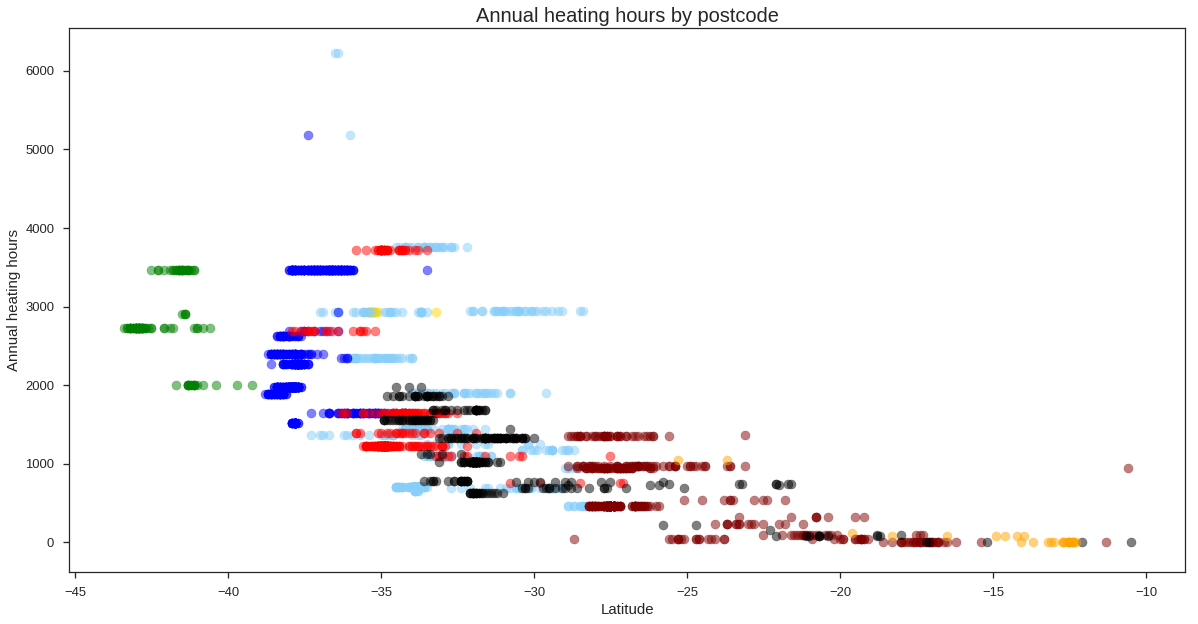

In [153]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)
 

ax.set_ylabel("Annual heating hours", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Annual heating hours by postcode', fontsize=20)

plt.show()

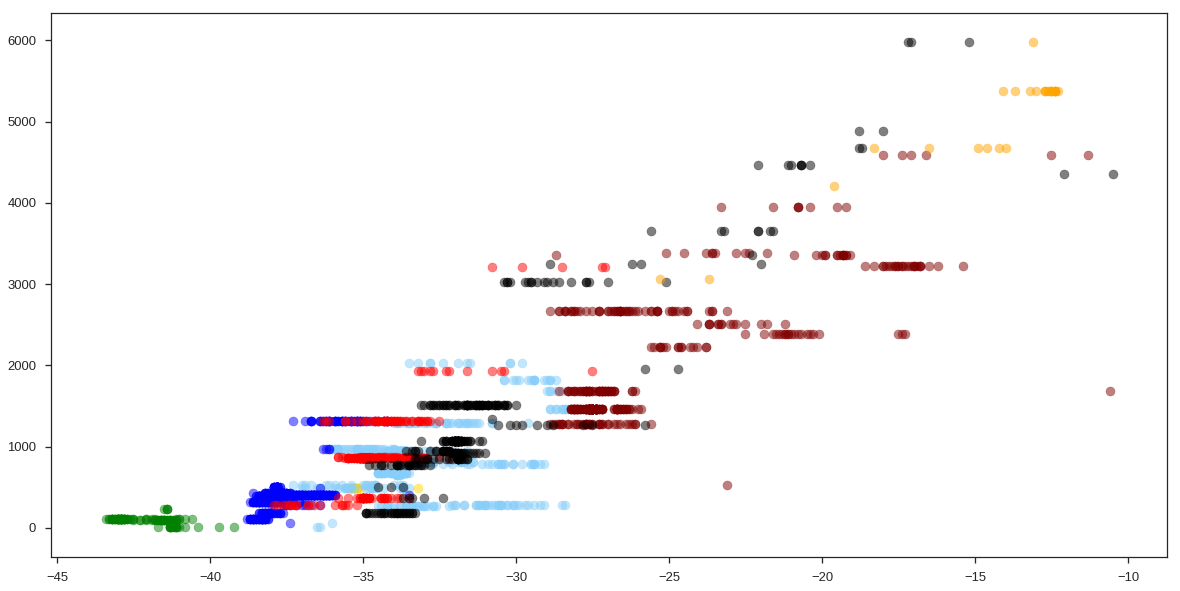

In [154]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)
    
plt.show()

In [155]:
# """hull test"""
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual cooling hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# #color = airdf['State colour']
# for state in states:
#     ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)
#     points = zip(x[state_vector==state], y[state_vector==state])
#     multip = geometry.MultiPoint(points)
#     multip.convex_hull
# #     convex_hull_polygon = point_collection.convex_hull
# #     plot_polygon(convex_hull_polygon)
# #     _ = pl.plot(x,y,'o', color='#f16824')
    
# plt.show()

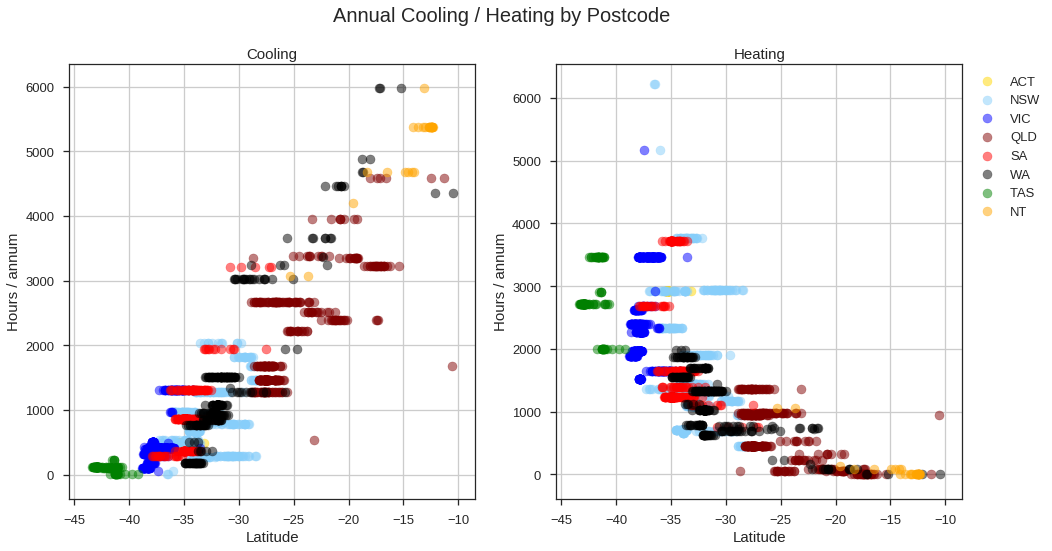

In [156]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Annual Cooling / Heating by Postcode", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],yc[state_vector==state], label = state, color=stateC[state], alpha = 0.5)

ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(x[state_vector==state],yh[state_vector==state], label = state, color=stateC[state], alpha = 0.5)


    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

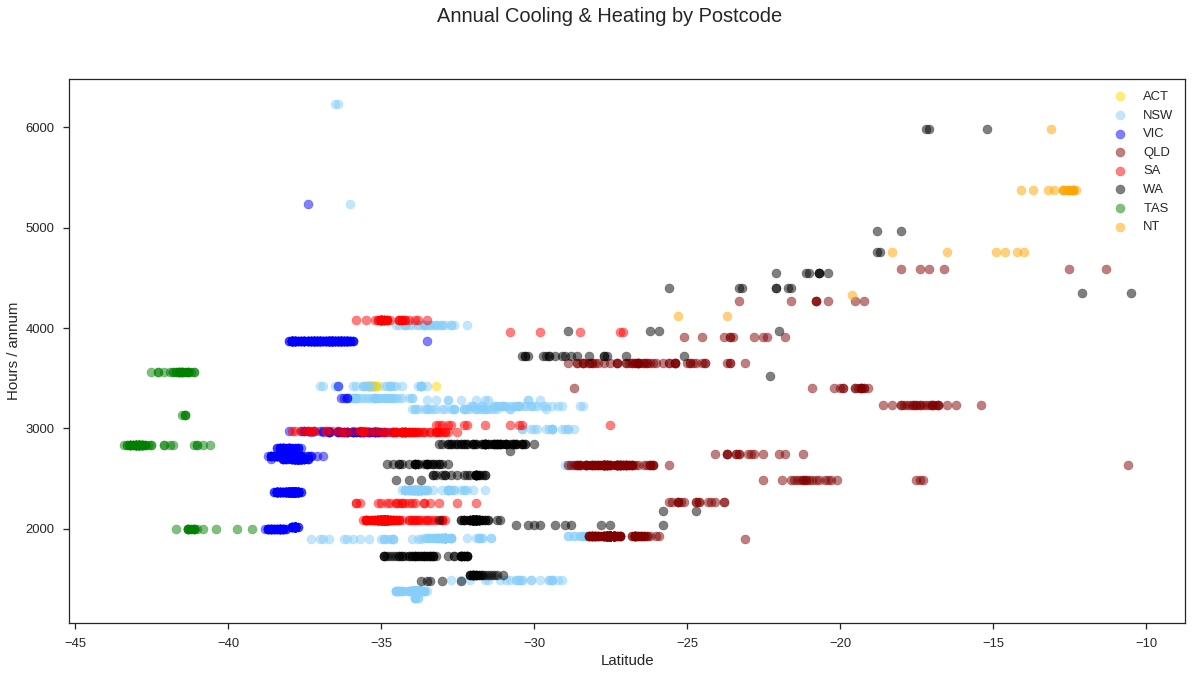

In [157]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
fig.suptitle("Annual Cooling & Heating by Postcode", fontsize = 20)
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], label = state, alpha = 0.5)

ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Latitude", fontsize=15)

plt.legend(loc='upper right');
plt.show()

## per state

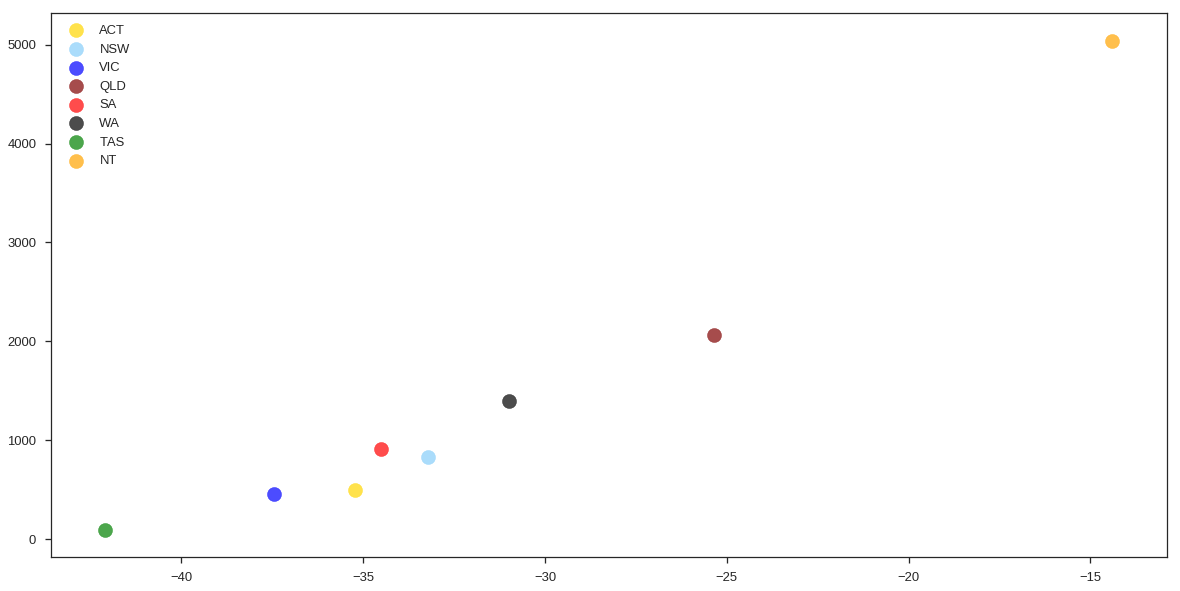

In [158]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),
               label = state, color=stateC[state], s = 200, alpha = 0.7)
plt.legend(loc='upper left');

plt.show()

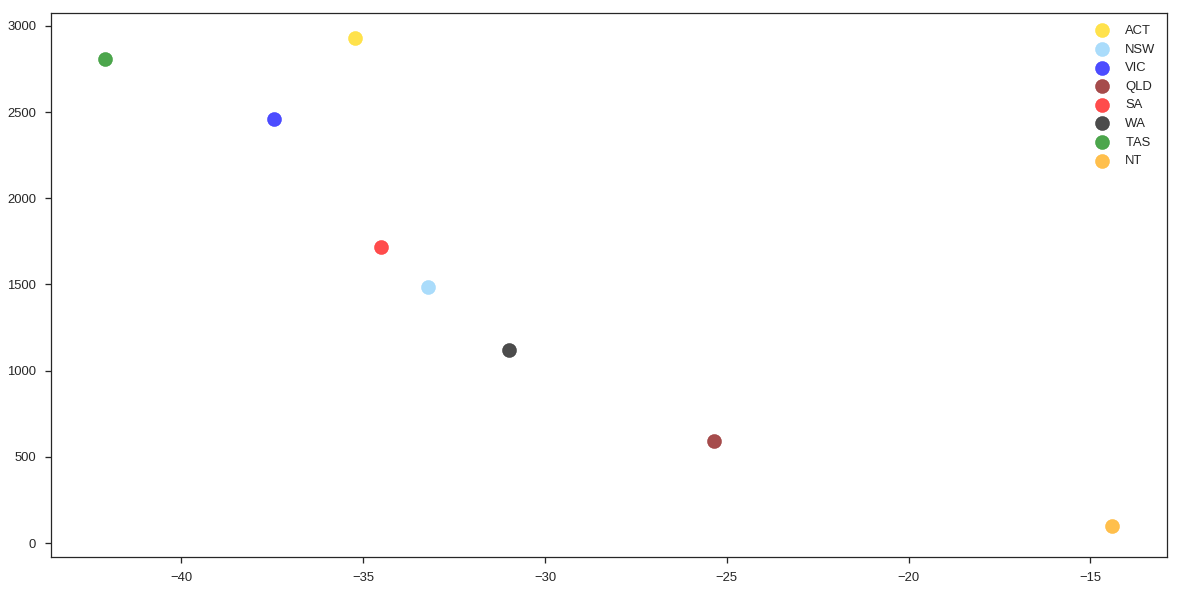

In [159]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
               label = state, s = 200, alpha = 0.7)
plt.legend(loc='upper right');
plt.show()

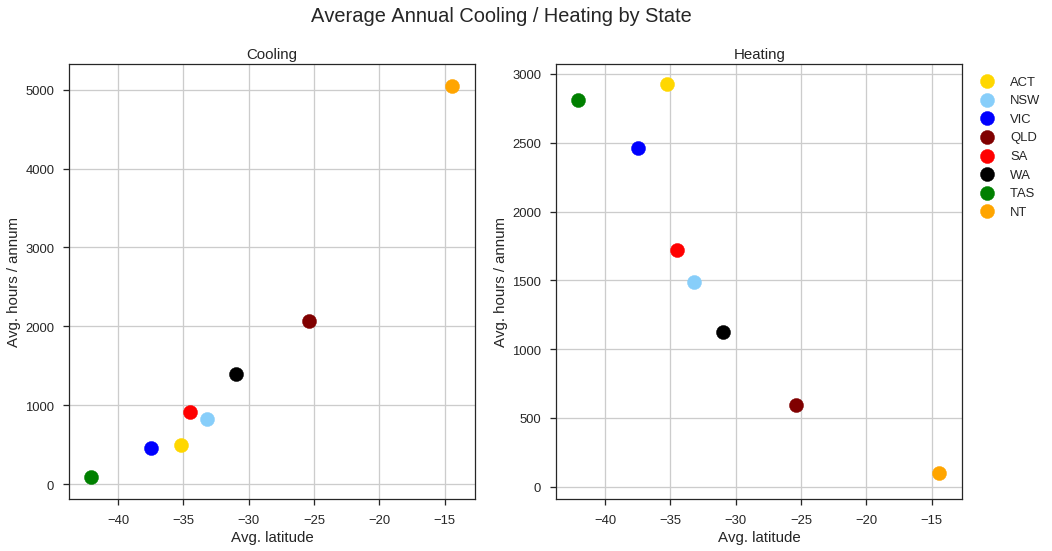

In [160]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Average Annual Cooling / Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Avg. hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
       ax.scatter(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Avg. hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

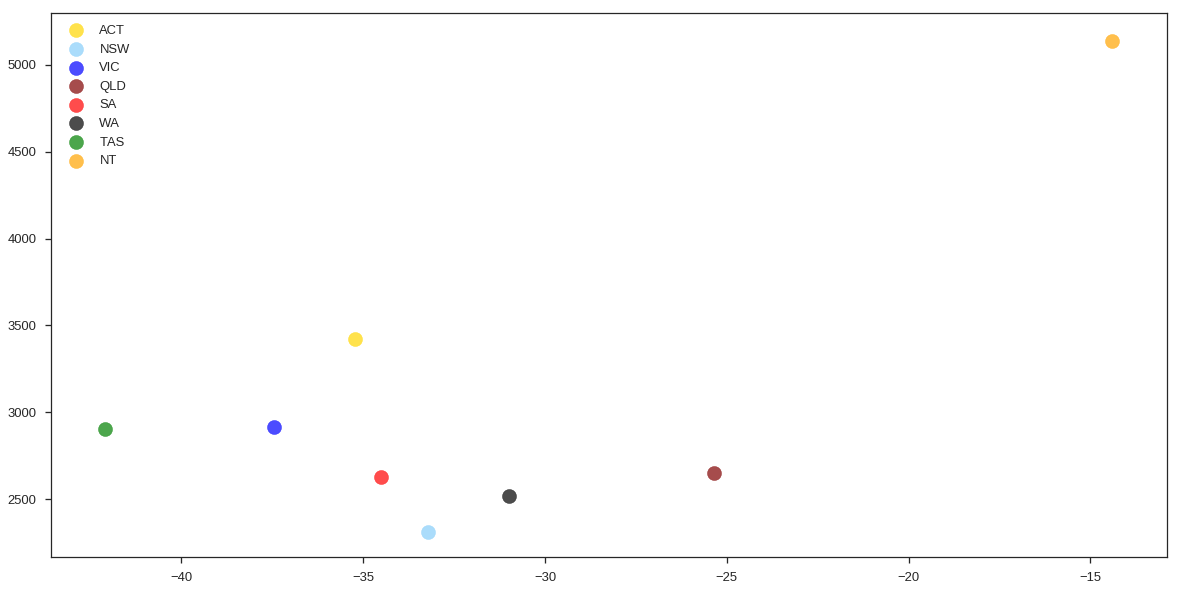

In [161]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
               label = state, s = 200, alpha = 0.7)
plt.legend(loc='upper left');
plt.show()

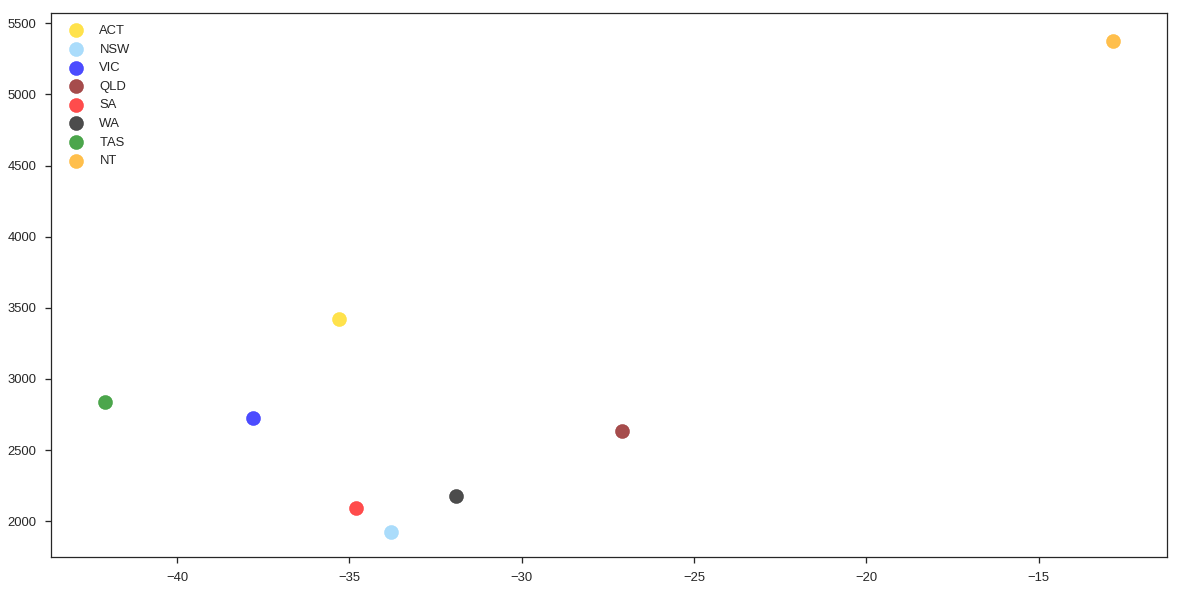

In [162]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200, alpha = 0.7)
plt.legend(loc='upper left');
plt.show()

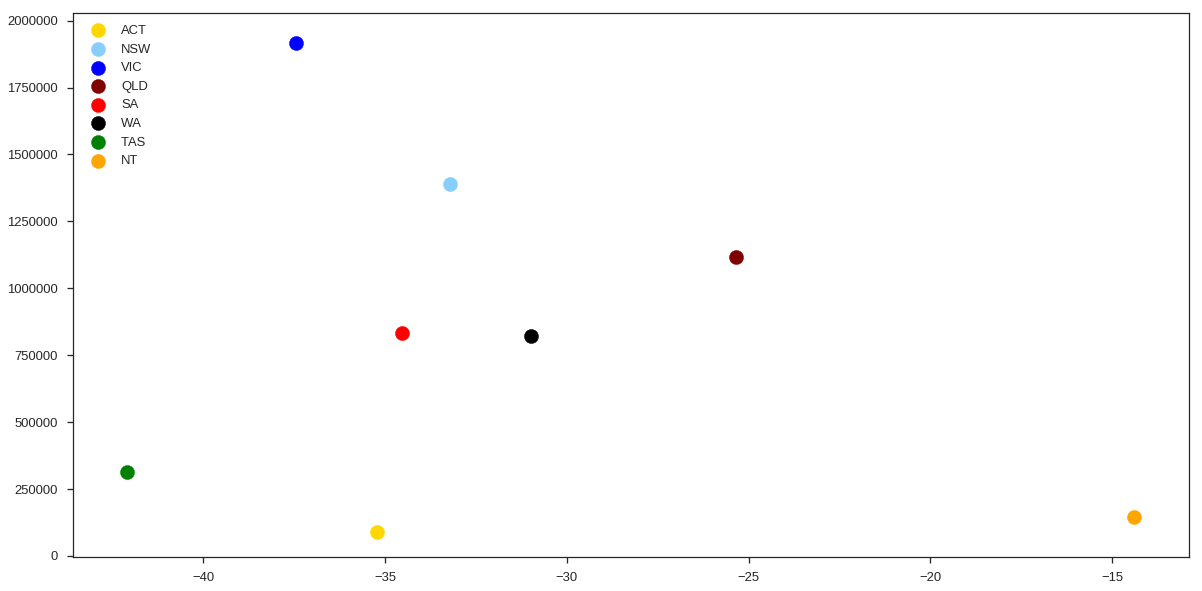

In [163]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
plt.legend(loc='upper left');
plt.show()

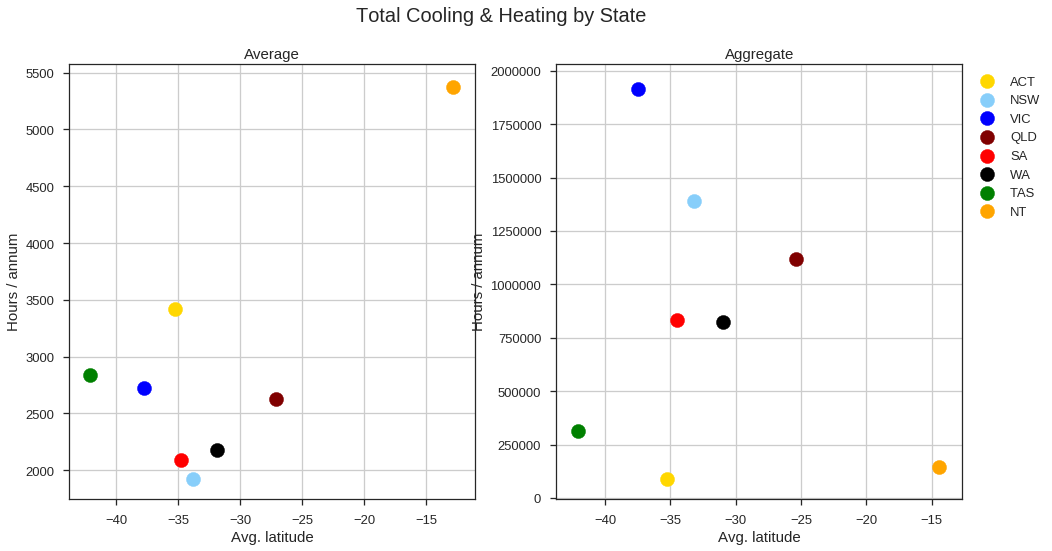

In [164]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Average", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Aggregate', fontsize=15)

ax.grid(True)    
plt.show()

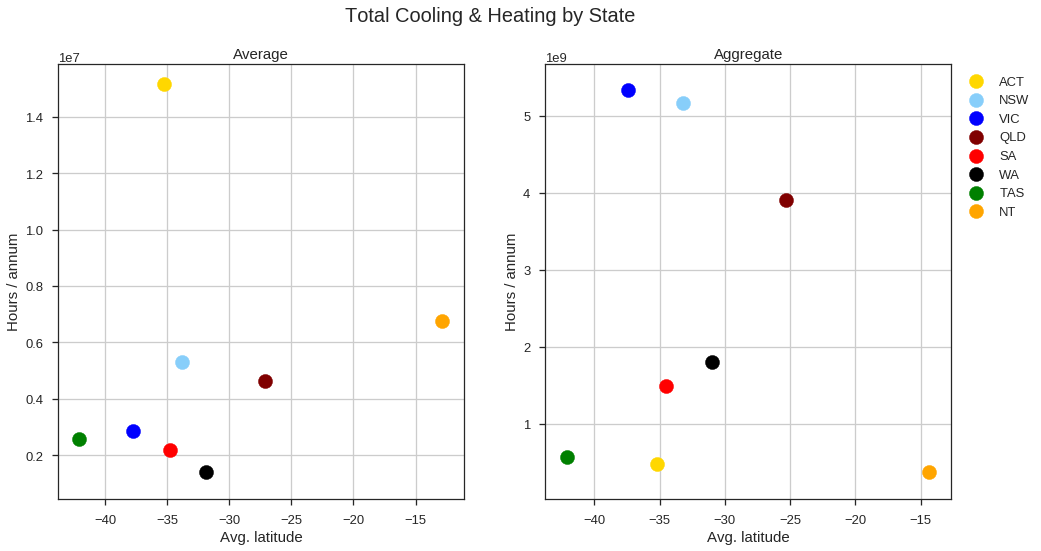

In [165]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
y = airdf["agHeating"] + airdf["agCooling"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Average", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.sum(y[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Aggregate', fontsize=15)

ax.grid(True)    
plt.show()

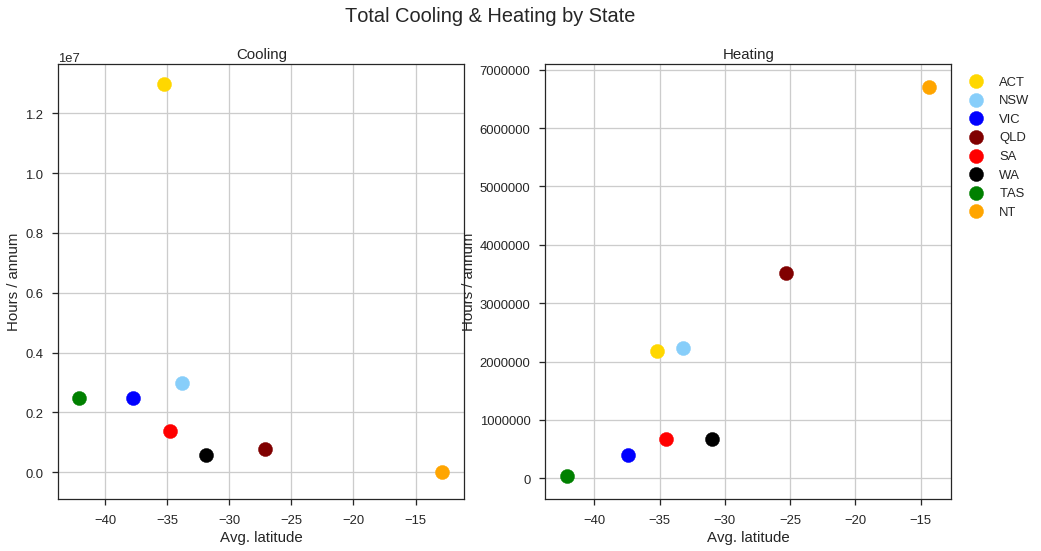

In [166]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["Latitude"]
yh =  airdf["agCooling"]
yc = airdf["agHeating"] 
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

#color = airdf['State colour']
for state in states:
    ax.scatter(np.median(x[state_vector==state]),np.median(yc[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.median(yh[state_vector==state]),color=stateC[state],
               label = state, s = 200)
    
plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

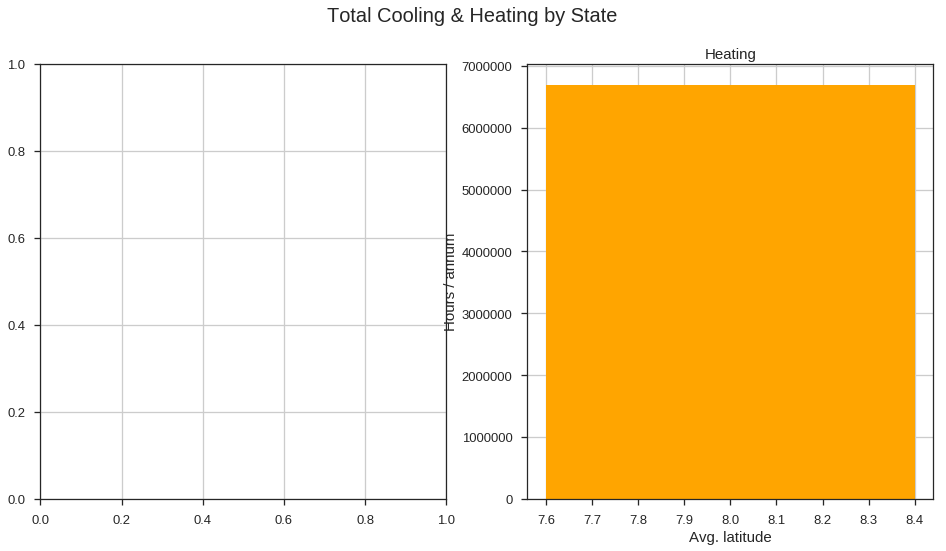

In [167]:
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle("Total Cooling & Heating by State", fontsize = 20)
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]


ax = fig.add_subplot(1, 2, 1)

x = airdf["State"]
yh =  airdf["agCooling"]
yc = airdf["agHeating"] 
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

#color = airdf['State colour']
# for state in states:
#     ax.scatter(np.median(x[state_vector==state]),np.median(yc[state_vector==state]),color=stateC[state],
#                label = state, s = 200)
    
x_pos=len(states)
    
# ax.set_ylabel("Hours / annum", fontsize=15)
# ax.set_xlabel("Avg. latitude", fontsize=15)
# ax.set_title("Cooling", fontsize=15)

# plt.legend(loc='upper left');
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)

for state in states:
        ax.bar(x_pos, np.median(yh[state_vector==state]),color=stateC[state],
               label = state)

# plt.legend(bbox_to_anchor = (1,1),loc=2, framealpha=1.0)
# leg=plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)

# for l in leg.get_lines():
#     l.set_alpha(1)
#     l.set_marker('.')
   
ax.set_ylabel("Hours / annum", fontsize=15)
ax.set_xlabel("Avg. latitude", fontsize=15)
ax.set_title('Heating', fontsize=15)

ax.grid(True)    
plt.show()

In [168]:
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = airdf["Latitude"]
# y = airdf["Annual heating hours"] + airdf["Annual cooling hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# #color = airdf['State colour']
# for state in states:
#     ax.scatter(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]),color=stateC[state],
#                label = state, s = 200, alpha = 0.7)
# avgx = []
# avgy = []
# for state in states:
#     avgx.append(np.mean(x[state_vector==state])
#     avgy.append(np.mean(y[state_vector==state])
# plt.plot(avgx, avgy)
# # plt.plot( x = (for state in states: np.mean(x[state_vector==state])),
# #          y = (for state in states: np.mean(y[state_vector==state]) )
# plt.legend(loc='upper left');
# plt.show()

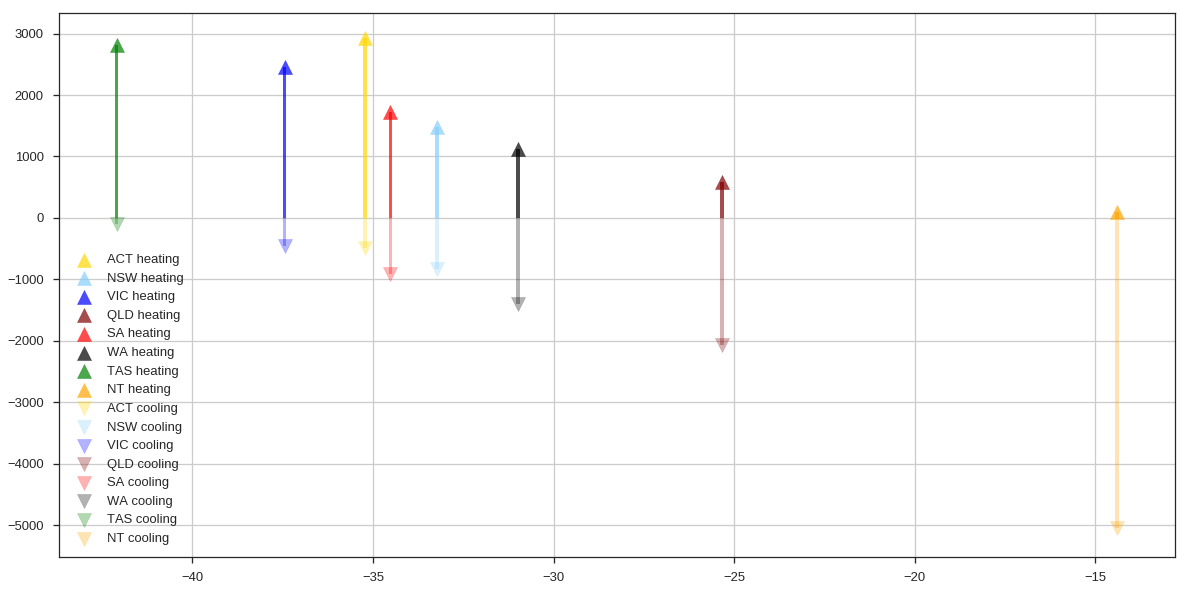

In [169]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),color=stateC[state], 
               label = state + " heating", marker ="^",  s = 200, alpha = 0.7)
    ax.bar(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),
               color=stateC[state], width = 0.1, alpha = 0.7)
for state in states:
    ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state])*-1,color=stateC[state], 
               label = state + " cooling", marker = "v",   s = 200, alpha = 0.3)
    ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
               color=stateC[state], width = 0.1, alpha = 0.3)
plt.legend(loc='lower left');
ax.grid(True)
plt.show()

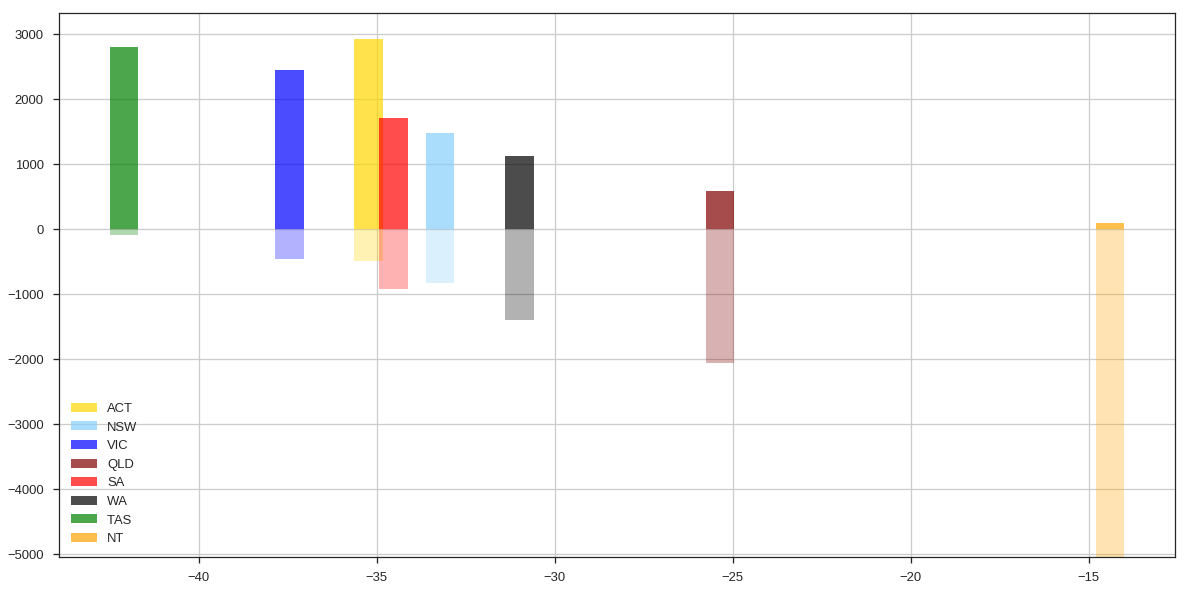

In [170]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
# color = airdf['State colour']
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.mean(yh[state_vector==state]),
               label = state, color=stateC[state], alpha = 0.7)
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
                color=stateC[state], alpha = 0.3)
# plt.plot(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]))
plt.legend(loc='lower left');

ax.grid(True)
plt.show()

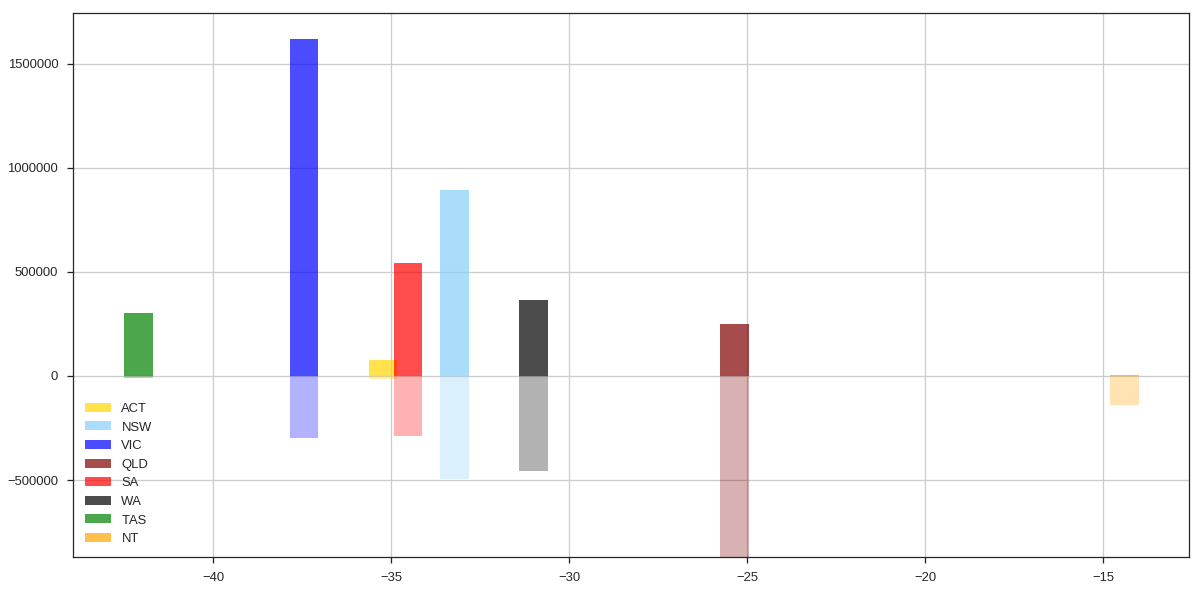

In [171]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Latitude"]
yc = airdf["Annual cooling hours"]
yh = airdf["Annual heating hours"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
# color = airdf['State colour']
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.sum(yh[state_vector==state]),
               label = state, color=stateC[state], alpha = 0.7)
for state in states:
    ax.bar(np.mean(x[state_vector==state]),np.sum(-yc[state_vector==state]),
                color=stateC[state], alpha = 0.3)
# plt.plot(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]))
plt.legend(loc='lower left');

ax.grid(True)
plt.show()

In [172]:
# states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
# x = [1,2,3,4,5,6,7,8]
# yc = airdf["Annual cooling hours"]
# yh = airdf["Annual heating hours"]
# stateC = {"ACT" : "gold", 
#               "NSW" : "lightskyblue", 
#               "VIC" : "blue", 
#               "QLD" : "maroon", 
#               "SA" : "r", 
#               "WA" : "k", 
#               "TAS" : "g", 
#               "NT" : "orange"}
# state_vector = airdf['State']
# # color = airdf['State colour']

# ax.bar(x, yc)
# # ax.bar(x, np.mean(states,np.sum(yh[state_vector==state])), color=stateC[state], alpha = 0.7)
# # for state in states:
# #     ax.bar(np.mean(x,np.sum(-yc[state_vector==state]),
# #                 color=stateC[state], alpha = 0.3)
# # plt.plot(np.mean(x[state_vector==state]),np.mean(y[state_vector==state]))
# # plt.legend(loc='lower left');

# # ax.grid(True)
# plt.show()

# Mapping

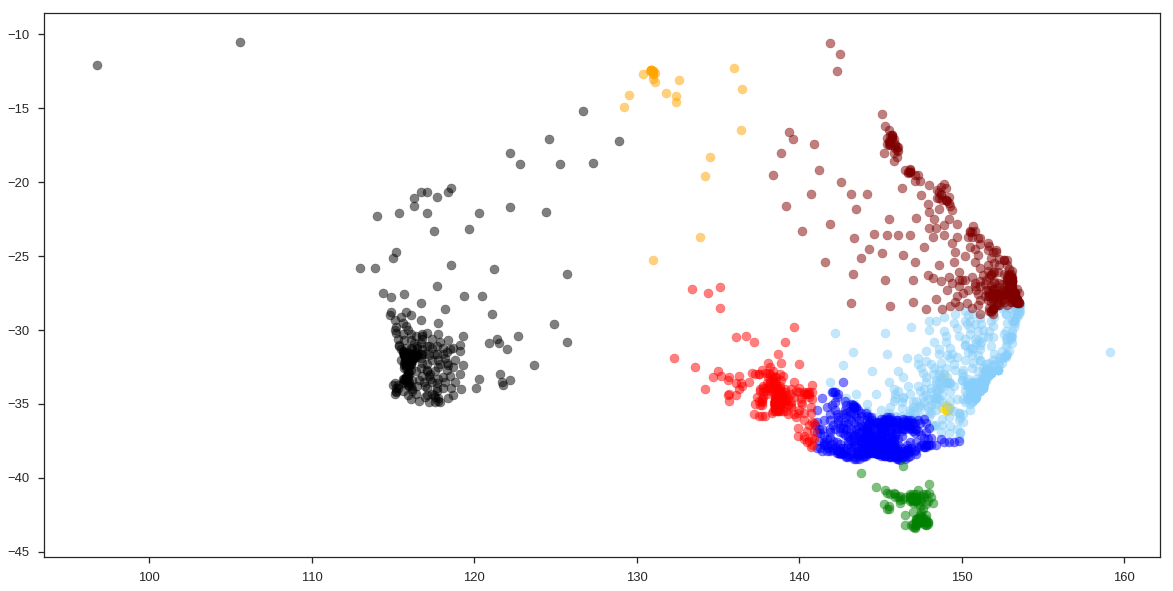

In [173]:
states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']
#color = airdf['State colour']
for state in states:
    ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)

# ax.grid(True)
plt.show()

continent                                               Oceania
gdp_md_est                                               800200
geometry      (POLYGON ((145.3979781434948 -40.7925485166058...
iso_a3                                                      AUS
name                                                  Australia
pop_est                                             2.12626e+07
Name: 8, dtype: object


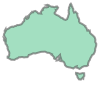

In [174]:
aus = gp.read_file(gp.datasets.get_path('naturalearth_lowres')).iloc[8]
print aus
aus.geometry


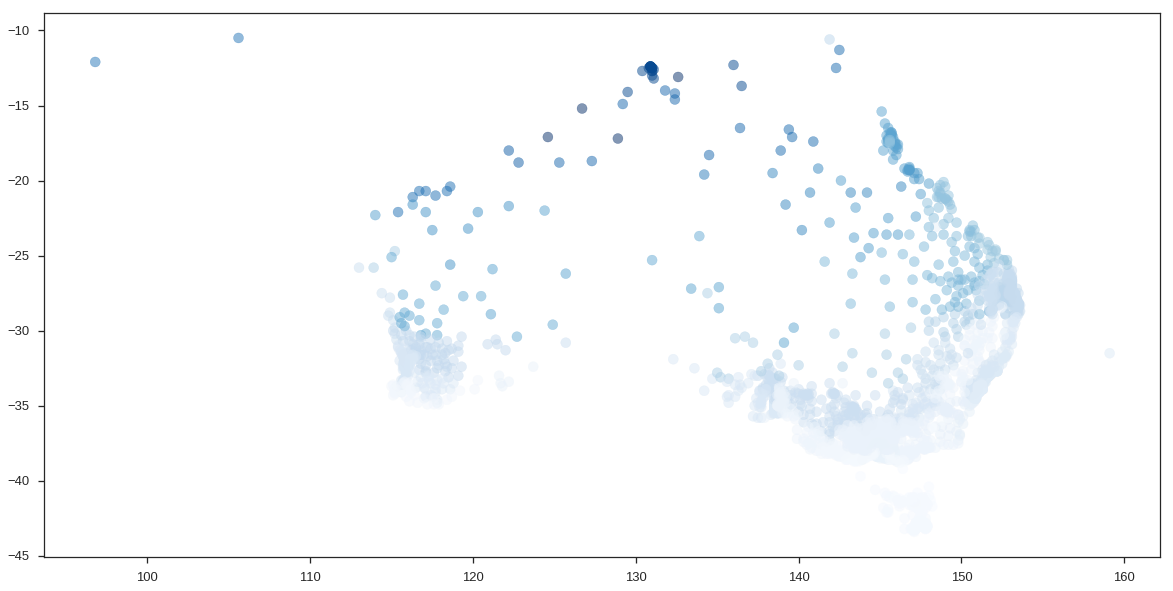

In [175]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"]
c = z
ax.scatter(x,y, c=c, cmap="Blues", s = 100, alpha = 0.5)
plt.show()

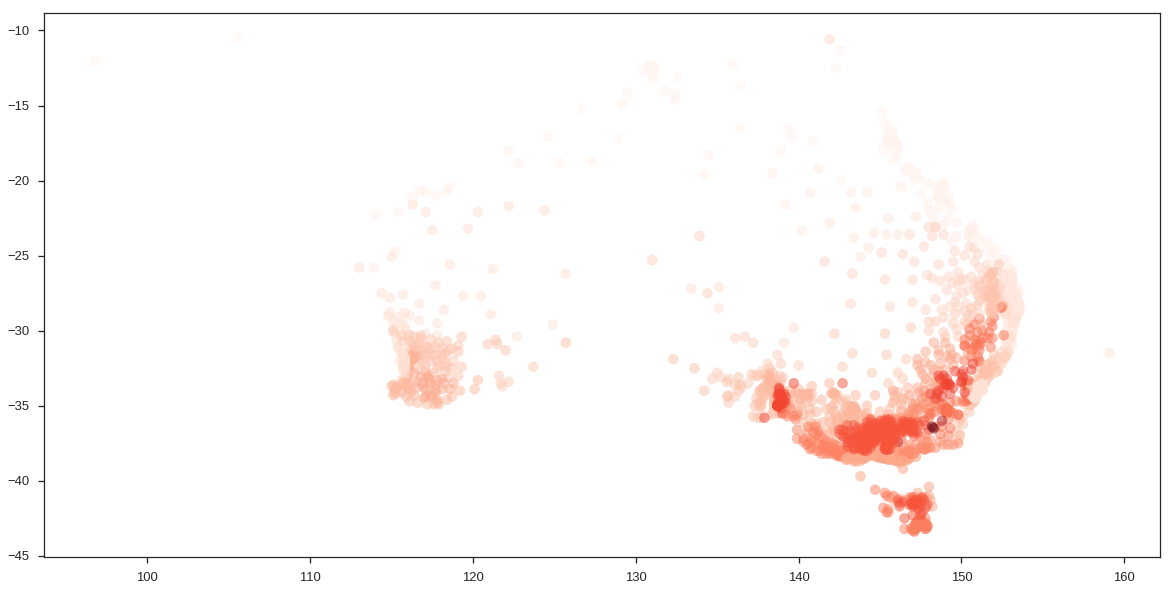

In [176]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]
c = z
ax.scatter(x,y, c=c, cmap="Reds", s = 100, alpha = 0.5)
plt.show()

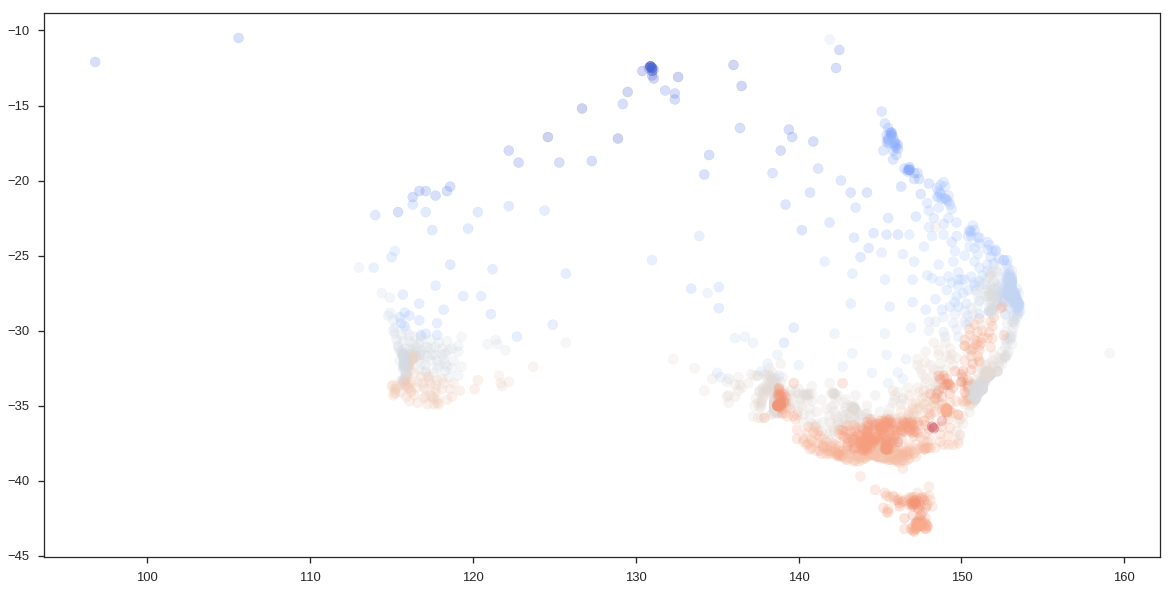

In [177]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
# c = np.abs(z)
c = z
ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)
plt.show()

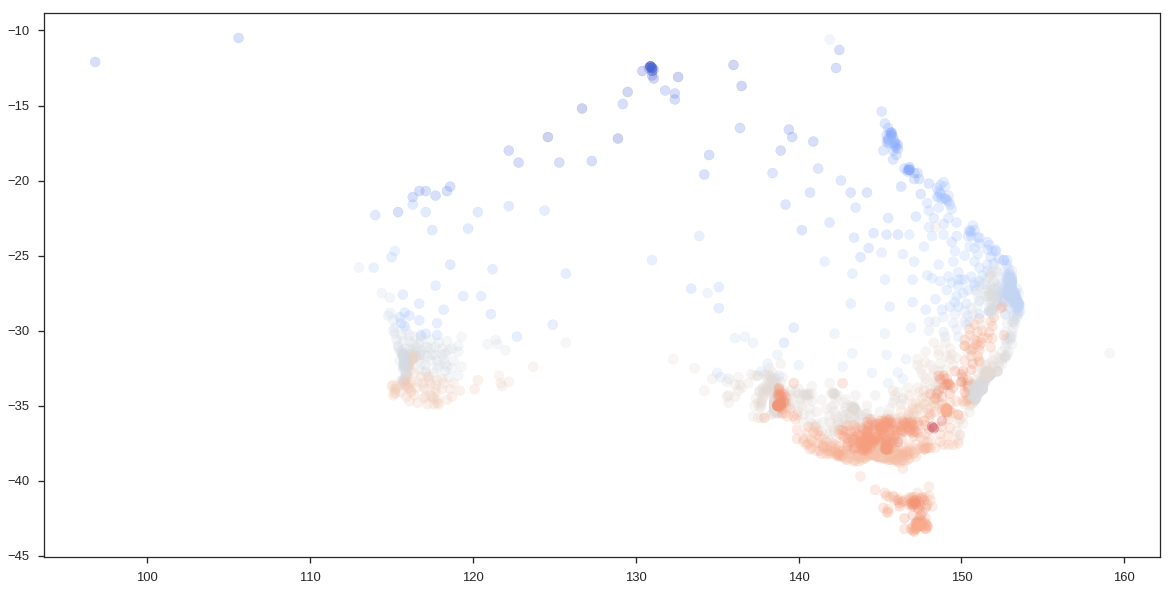

In [178]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
# c = np.abs(z)
c = z
ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)
aus.plot
plt.show()

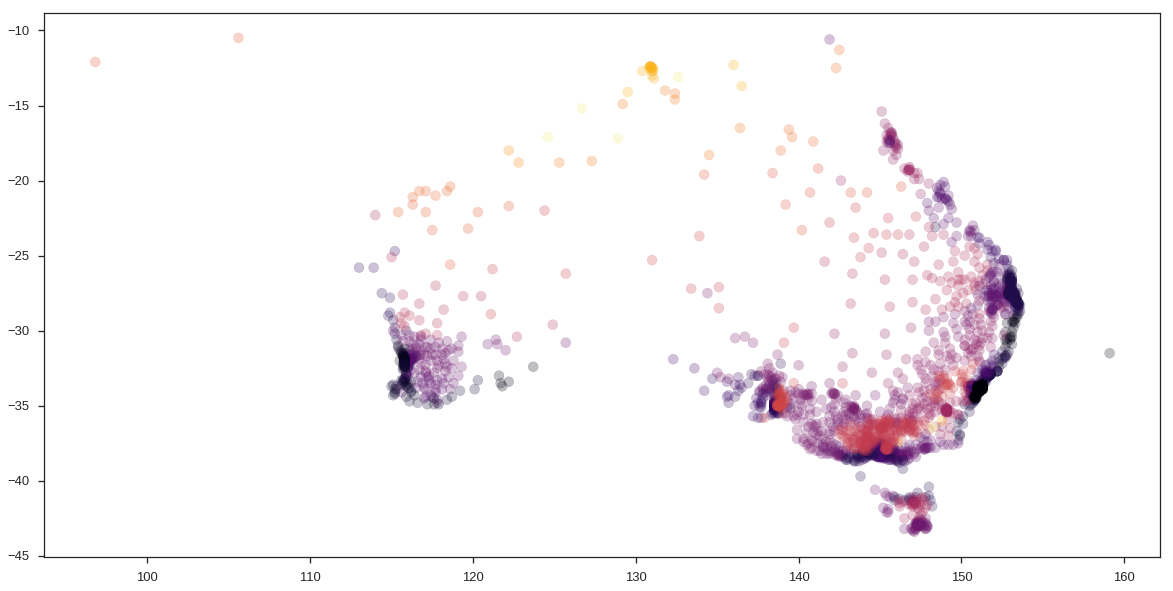

In [179]:
fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]
c = np.abs(z)
ax.scatter(x,y, c=z, cmap="inferno", s = 100, alpha = 0.25)
plt.show()

In [180]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()


In [181]:
# pts = [airdf[]]

# heatmap(pts, bins=50, smoothing=1.5)

In [182]:
# heatmap = np.histogram2d(y, x, bins=100, 100)
# # logheatmap = np.log(heatmap)
# # logheatmap[np.isneginf(logheatmap)] = 0
# logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
# plt.imshow(logheatmap, cmap=cmap, extent=extent)

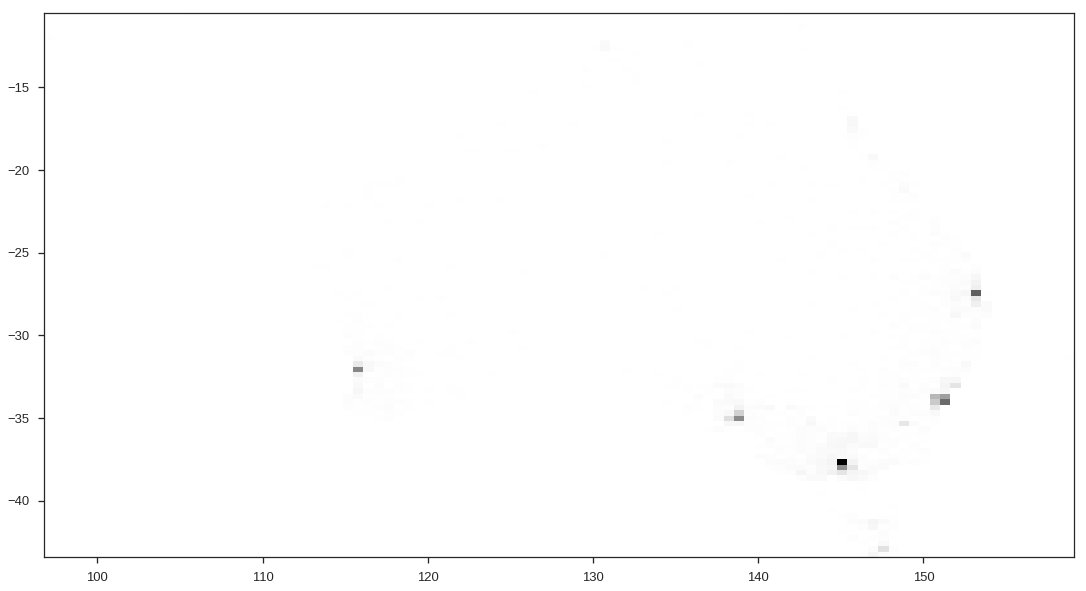

In [183]:

x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]

heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

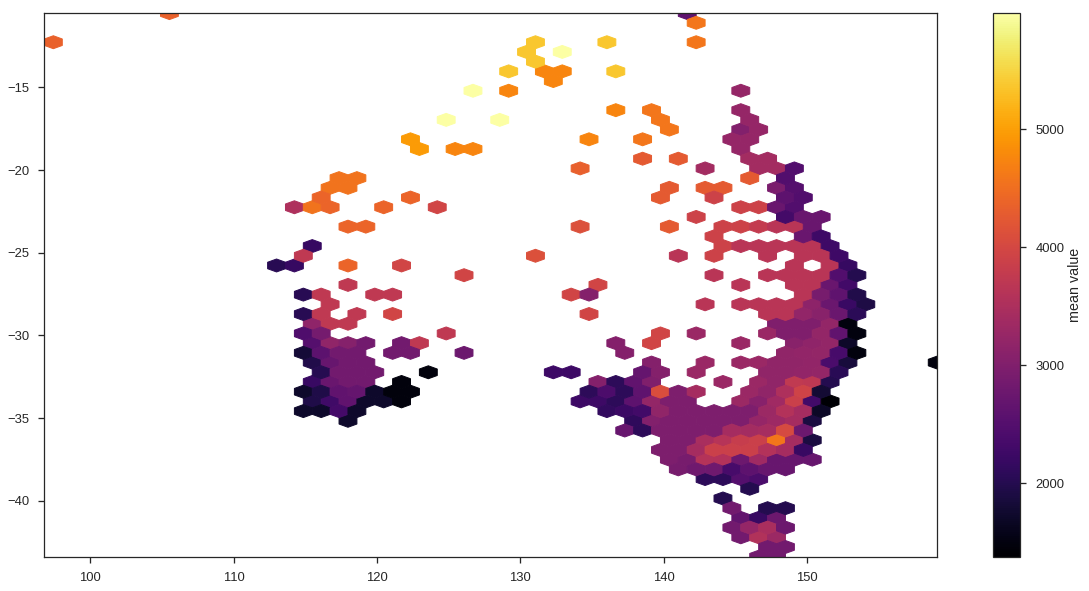

In [184]:
from matplotlib import mlab
n = 1e5
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 2, 2, 0, 0)
Z2 = mlab.bivariate_normal(X, Y, 4, 1, 1, 1)
ZD = Z2 - Z1
x = airdf["Longitude"]
y = airdf["Latitude"]
z = airdf["Annual cooling hours"] + airdf["Annual heating hours"]
gridsize=50
plt.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

plt.hexbin(x, y, C=z, gridsize=gridsize, cmap="inferno", bins=None)
plt.axis([x.min(), x.max(), y.min(), y.max()])

cb = plt.colorbar()
cb.set_label('mean value')
plt.show()   

## POA

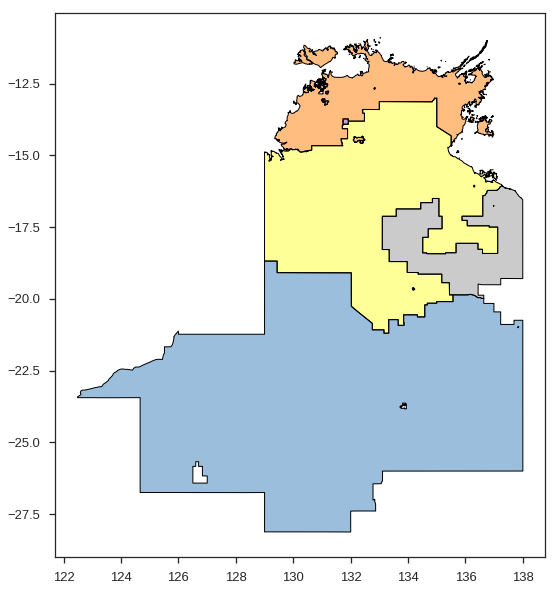

In [185]:
gp_adf_NT.geometry.plot()

In [186]:
# ch = dict(column='Annual cooling hours', linewidth=0, colormap='spring')
# gp_adf_NT.plot(**ch)

In [187]:
# sc = dict(  linewidth=0, facecolor= gp_airdf["State colour"])
# # sc = dict( column='Postcode', linewidth=0, facecolor= gp_airdf["State colour"])
# gp_airdf[gp_airdf.State == "SA"].plot(**sc)
# # gp_airdf.geometry(**sc)

In [188]:
# ch = dict(column='Annual heating hours', linewidth=0, colormap='hot')
# gp_airdf[gp_airdf.State == "WA"].plot(**ch)

In [189]:

ch = dict(column='Occupied private dwellings', linewidth=0, colormap='rainbow')
gp_airdf[ if interpoa.contains(gp_airdf.Postcode) ].plot()

SyntaxError: invalid syntax (<ipython-input-189-0d6f0f51ba2c>, line 3)

In [ ]:
# for state in states:
#     gp_airdf[ gp_airdf["Postcode"].isin(interpoa) and gp_airdf[gp_airdf.State == "WA"] ].plot(c=gp_airdf["State colour"])
#     ax.scatter(np.mean(x[state_vector==state]),np.mean(yc[state_vector==state])*-1,color=stateC[state], 
#                label = state + " cooling", marker = "v",   s = 200, alpha = 0.3)
#     ax.bar(np.mean(x[state_vector==state]),np.mean(-yc[state_vector==state]),
#                color=stateC[state], width = 0.1, alpha = 0.3)

gp_airdf[ gp_airdf["Postcode"].isin(interpoa) ].plot(color="red")

In [ ]:
# ch = dict(column='Occupied private dwellings', linewidth=0, colormap='rainbow')
# gp_airdf[gp_airdf.State == "WA"].plot(**ch)

In [ ]:
# ch = dict(column='Occupied private dwellings' , linewidth=1, colormap='inferno')
# gp_airdf[gp_airdf.State == "ACT"].plot(**ch)

In [ ]:
# ch = dict(column='Annual cooling hours', linewidth=0, colormap='Blues')
# gp_adf_NSW.plot(**ch)

In [ ]:
# ch = dict(column='Annual heating hours', linewidth=0, colormap='Reds')
# gp_adf_NSW.plot(**ch)

In [ ]:
# ch = dict(column='Annual cooling hours', linewidth=0, colormap='Blues')
# gp_airdf.plot(**ch)

In [ ]:
# ch = dict(column='Annual heating hours', linewidth=0, colormap='Reds')
# gp_airdf.plot(**ch)

In [ ]:
# airdf.iloc[1].geometry
# # 

In [ ]:
# shapely.geometry.plot(airdf)

In [ ]:
# print type(airdf["geometry"].iloc[1])
# airdf["geometry"].iloc[1].plot()

In [ ]:
# airdf.iloc[1].plot()

In [ ]:
# shapely.plot(airdf["geometry"].iloc[1])

## Basemap

In [ ]:
latmin = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
latmax = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
lonmin = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
lonmax = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
latmid = -25.6
lonmid = 130

m = Basemap(llcrnrlon=lonmin, llcrnrlat=-50, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='cea')

water = 'lightskyblue'
earth = 'cornsilk'
continents = m.fillcontinents(
    color=earth,
    lake_color=water)
bound= m.drawmapboundary(fill_color=water)
# m.shadedrelief()
# m.etopo()
# m.bluemarble()

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


coast = m.drawcoastlines()
m.drawstates(color='0.5')


In [ ]:
latmin = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
latmax = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
lonmin = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
lonmax = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
latmid = -25.6
lonmid = 130

water = 'lightskyblue'
earth = 'cornsilk'

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')
m.drawcoastlines()
m.drawstates(color='0.5')

states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
x = airdf["Longitude"].tolist()
y = airdf["Latitude"].tolist()
x, y = m(x, y) 
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

x, y = m(x, y) 
m.scatter(x,y, 5, marker='o', lw=.25, alpha = 0.5)

# for index, site in airdf.iterrows():
#     y, x = m(site.x, site.y)  # Translate lat/lon to basemap coordinates
#     dotColour = airdf["State colour"]
#     m.scatter(x, y, marker='o', alpha=0.5)




# plt.show()

In [ ]:
latmin = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
latmax = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
lonmin = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
lonmax = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
latmid = -25.6
lonmid = 130

water = 'lightskyblue'
earth = 'cornsilk'

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')

states = ["ACT", "NSW", "VIC", "QLD", "SA" , "WA", "TAS", "NT"]
# fig, ax = plt.subplots()
x = airdf["Longitude"]
y = airdf["Latitude"]
# x, y = m(x, y)
stateC = {"ACT" : "gold", 
              "NSW" : "lightskyblue", 
              "VIC" : "blue", 
              "QLD" : "maroon", 
              "SA" : "r", 
              "WA" : "k", 
              "TAS" : "g", 
              "NT" : "orange"}
state_vector = airdf['State']

# m.plot(x,y, 5, marker='o', lw=.25, alpha = 0.5)

# for index, site in airdf.iterrows():
#     y, x = m(y, x)  # Translate lat/lon to basemap coordinates
#     dotColour = airdf["State colour"]
#     m.plot(x, y, marker='o', markersize=3.0, color=dotColour, alpha=0.5)
    
# m.shadedrelief()
# m.etopo()
# m.bluemarble()

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)

for state in states:
    sx = x[state_vector==state]
    sy = y[state_vector==state]
    sx = sx.tolist()
    sy = sy.tolist()
    mx, my = m(sx, sy)
    m.scatter(mx,my,color=stateC[state], alpha = 0.7)

coast = m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")




# for state in states:
#     ax.scatter(x[state_vector==state],y[state_vector==state],color=stateC[state], alpha = 0.5)

# ax.grid(True)
# plt.show()

In [ ]:
from descartes import PolygonPatch

In [ ]:
latmin = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
latmax = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
lonmin = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
lonmax = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
latmid = -25.6
lonmid = 130

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')
    
# m.shadedrelief()
# m.etopo()
# m.bluemarble()

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


coast = m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# poaShapes = poa_shp_file_name
# poaShapes = "POA_2016_AUST"

# m.readshapefile(poaShapes, 'comarques', drawbounds = True)



patches = []
# selection = gp_airdf[gp_airdf.State == "NT"]
selection = gp_adf_NT
for poly in selection.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(m, poly)
        patches.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(m, poly)
            patches.append(PolygonPatch(mpoly))

            
# ax1 = gp_adf_NT.plot()
# # ax1.set_aspect(2)
# poaproject = ax1.add_collection(
#     PatchCollection(patches, match_original=True))
    
m.plot(PatchCollection(patches, match_original=True))

# for info, shape in zip(map.comarques_info, map.comarques):
#     if info['nombre'] == 'Selva':
#         x, y = zip(*shape) 
#         map.plot(x, y, marker=None,color='m')

In [ ]:
latmin = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
latmax = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
lonmin = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
lonmax = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
latmid = -25.6
lonmid = 130

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')
    
# m.shadedrelief()
# m.etopo()
# m.bluemarble()

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


coast = m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# poaShapes = poa_shp_file_name
# poaShapes = "POA_2016_AUST"

# m.readshapefile(poaShapes, 'comarques', drawbounds = True)



# patches = []
# # selection = gp_airdf[gp_airdf.State == "NT"]
# selection = gp_adf_NT
# for poly in selection.geometry:
#     if poly.geom_type == 'Polygon':
#         mpoly = shapely.ops.transform(m, poly)
#         patches.append(PolygonPatch(mpoly))
#     elif poly.geom_type == 'MultiPolygon':
#         for subpoly in poly:
#             mpoly = shapely.ops.transform(m, poly)
#             patches.append(PolygonPatch(mpoly))

            
# ax1 = gp_adf_NT.plot()
# # ax1.set_aspect(2)
# poaproject = ax1.add_collection(
#     PatchCollection(patches, match_original=True))
    
ax.add_collection(matplotlib.collections.PatchCollection(mpatches, match_original=True))
ax.plot()

plt.show()
            

# for info, shape in zip(map.comarques_info, map.comarques):
#     if info['nombre'] == 'Selva':
#         x, y = zip(*shape) 
#         map.plot(x, y, marker=None,color='m')

In [ ]:
latmin = -44+1     # (South East Cape Tasmania 43° 38' 40" S 146° 49' 30" E)
latmax = -9+1.5    # (Boigu Island 09° 16' S 142° 13' E)
lonmin = 100 # (Steep point 26° 09' 5" S 113° 09' 18" E
lonmax = 160   # (Cape Byron 28° 38' 15" S 153° 38' 14" E)
latmid = -25.6
lonmid = 130

fig, ax = plt.subplots()

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')
    
# m.shadedrelief()
# m.etopo()
# m.bluemarble()

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)


coast = m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# poaShapes = poa_shp_file_name
# poaShapes = "POA_2016_AUST"

# m.readshapefile(poaShapes, 'comarques', drawbounds = True)

codes = gp.read_file('POA_2016_AUST.shp')

patches = []

#add polygons
for poly in codes.geometry:
    #deal with single polygons and multipolygons
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(poly, facecolor='blue', alpha=1)
        #plt.gca().add_patch(p)
        #ax.add_patch(p)
        patches.append(p)

    elif poly.geom_type == 'MultiPolygon':
        for single in poly:
            q = PolygonPatch(single,facecolor='red', alpha=1)
            #ax.add_patch(p)
            patches.append(q)
    else:
        nothing

# patches = []
# # selection = gp_airdf[gp_airdf.State == "NT"]
# selection = gp_adf_NT
# for poly in selection.geometry:
#     if poly.geom_type == 'Polygon':
#         mpoly = shapely.ops.transform(m, poly)
#         patches.append(PolygonPatch(mpoly))
#     elif poly.geom_type == 'MultiPolygon':
#         for subpoly in poly:
#             mpoly = shapely.ops.transform(m, poly)
#             patches.append(PolygonPatch(mpoly))

# ch = dict(column='Annual cooling hours', linewidth=0, colormap='Blues')
# w = gp_adf_NSW.plot(**ch)

# p = PatchCollection(patches, match_original=True, cmap="spring")
# m.plot(p)
# ax.add_collection(w)


# ch = dict(column='Annual heating hours', linewidth=0, colormap='hot')
# patches.plot(colormap='hot')

ax.add_collection(matplotlib.collections.PatchCollection(patches, match_original=True))
ax.plot()

plt.show()
            
# ax1 = gp_adf_NT.plot()
# # ax1.set_aspect(2)
# poaproject = ax1.add_collection(
#     PatchCollection(patches, match_original=True))
    
# m.plot(PatchCollection(patches, match_original=True))

# for info, shape in zip(map.comarques_info, map.comarques):
#     if info['nombre'] == 'Selva':
#         x, y = zip(*shape) 
#         map.plot(x, y, marker=None,color='m')

In [ ]:
# fig, ax = plt.subplots()

# m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
#     urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
#     lat_0=latmid, lon_0=lonmid, 
#     area_thresh=100.,projection='tmerc')
    
# m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)
# m.drawcoastlines()
# m.drawstates(color='0.7')
# merid = m.drawmeridians(
#     np.arange(-180, 180, 10), color="lightgrey",
#     labels=[False, False, False, True])
# parall = m.drawparallels(
#     np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# # poaShapes = poa_shp_file_name
# # poaShapes = "POA_2016_AUST"

# # m.readshapefile(poaShapes, 'comarques', drawbounds = True)



# # patches = []
# # # selection = gp_airdf[gp_airdf.State == "NT"]
# # selection = gp_adf_NT
# # for poly in selection.geometry:
# #     if poly.geom_type == 'Polygon':
# #         mpoly = shapely.ops.transform(m, poly)
# #         patches.append(PolygonPatch(mpoly))
# #     elif poly.geom_type == 'MultiPolygon':
# #         for subpoly in poly:
# #             mpoly = shapely.ops.transform(m, poly)
# #             patches.append(PolygonPatch(mpoly))

            
# # ax1 = gp_adf_NT.plot()
# # # ax1.set_aspect(2)
# # poaproject = ax1.add_collection(
# #     PatchCollection(patches, match_original=True))
    
# # p = PatchCollection(patches, match_original=True, cmap="spring")
# # # m.plot(p)
# # ax.add_collection(p)

# # ax.add_collection(patches)
# # ch = dict(column='Annual heating hours', linewidth=0, colormap='hot')
# # patches.plot(colormap='hot')

# # plt.show()
# # for info, shape in zip(map.comarques_info, map.comarques):
# #     if info['nombre'] == 'Selva':
# #         x, y = zip(*shape) 
# #         map.plot(x, y, marker=None,color='m')

In [ ]:


shapefilename = gp.read_file('POA_2016_AUST.shp')
shp = fiona.open(shapefilename)
coords = shp.bounds
shp.close()



In [ ]:
gp_adf_NT
shapefilename
Mgp_adf_NT = gp_adf_NT

In [ ]:
def convert_3D_2D(geometry):
    '''
    Takes a GeoSeries of Multi/Polygons and returns a list of Multi/Polygons
    '''
    import geopandas as gp
    new_geo = []
    for p in geometry:
        if p.has_z:
            if p.geom_type == 'Polygon':
                lines = [xy[:2] for xy in list(p.exterior.coords)]
                new_p = Polygon(lines)
                new_geo.append(new_p)
            elif p.geom_type == 'MultiPolygon':
                new_multi_p = []
                for ap in p:
                    lines = [xy[:2] for xy in list(ap.exterior.coords)]
                    new_p = Polygon(lines)
                    new_multi_p.append(new_p)
                new_geo.append(MultiPolygon(new_multi_p))
    return new_geo




In [ ]:
Mgp_adf_NT.geometry = convert_3D_2D(gp_adf_NT.geometry)

In [ ]:
def custom_colorbar(cmap, ncolors, labels, **kwargs):    
    """Create a custom, discretized colorbar with correctly formatted/aligned labels.
    
    cmap: the matplotlib colormap object you plan on using for your graph
    ncolors: (int) the number of discrete colors available
    labels: the list of labels for the colorbar. Should be the same length as ncolors.
    """
    from matplotlib.colors import BoundaryNorm
    from matplotlib.cm import ScalarMappable
        
    norm = BoundaryNorm(range(0, ncolors), cmap.N)
    mappable = ScalarMappable(cmap=cmap, norm=norm)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors+1)+0.5)
    colorbar.set_ticklabels(range(0, ncolors))
    colorbar.set_ticklabels(labels)
    return colorbar

# figwidth = 14
# fig = plt.figure(figsize=(figwidth, figwidth*h/w))
# ax = fig.add_subplot(111, axisbg='w', frame_on=False)

w = gp_adf_NT["Annual heating hours"]
z = gp_adf_NT["Annual heating hours"]- gp_adf_NT["Annual cooling hours"]
c = z

cmap = plt.get_cmap('Blues')
# draw neighborhoods with grey outlines
gp_adf_NT['patches'] = gp_adf_NT['geometry'].map(lambda x: PolygonPatch(x, ec='#111111', lw=.8, alpha=1., zorder=4))
pc = PatchCollection(gp_adf_NT['patches'], match_original=True)
# apply our custom color values onto the patch collection
cmap_list = [cmap(val) for val in (w.values - w.values.min())/(
                  w.values.max()-float(w.values.min()))]
pc.set_facecolor(cmap_list)
ax.add_collection(pc)

# #Draw a map scale
# m.drawmapscale(coords[0] + 0.08, coords[1] + -0.01,
#     coords[0], coords[1], 10.,
#     fontsize=16, barstyle='fancy', labelstyle='simple',
#     fillcolor1='w', fillcolor2='#555555', fontcolor='#555555',
#     zorder=5, ax=ax,)

# # ncolors+1 because we're using a "zero-th" color
# cbar = custom_colorbar(cmap, ncolors=len(jenks_labels)+1, labels=jenks_labels, shrink=0.5)
# cbar.ax.tick_params(labelsize=16)

# fig.suptitle("Time Spent in Seattle Neighborhoods", fontdict={'size':24, 'fontweight':'bold'}, y=0.92)
# ax.set_title("Using location data collected from my Android phone via Google Takeout", fontsize=14, y=0.98)
# qax.text(1.35, 0.04, "Collected from 2012-2014 on Android 4.2-4.4\nGeographic data provided by data.seattle.gov", 
#     ha='right', color='#555555', style='italic', transform=ax.transAxes)
# ax.text(1.35, 0.01, "BeneathData.com", color='#555555', fontsize=16, ha='right', transform=ax.transAxes)

fig     = plt.figure()
ax      = fig.add_subplot(111)

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')

_out = m.readshapefile(shapefilename, name='seattle', drawbounds=False, color='none', zorder=2)

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)
m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# m.gp_adf_NT.geometry.plot()

# map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
#              resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

# map.drawmapboundary(fill_color='aqua')
# map.fillcontinents(color='#ddaa66',lake_color='aqua')
# map.drawcoastlines()

# map.readshapefile('../sample_files/comarques', 'comarques', drawbounds = False)

# patches   = []

# for info, shape in zip(map.comarques_info, map.comarques):
#     if info['nombre'] == 'Selva':
#         patches.append( Polygon(np.array(shape), True) )
 
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
c = z
# ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)

# values = df[year]
cm = plt.get_cmap('coolwarm')
# scheme = [cm(i / num_colors) for i in range(num_colors)]
# bins = np.linspace(values.min(), values.max(), num_colors)
# df['bin'] = np.digitize(values, bins) - 1
# df.sort_values('bin', ascending=False).head(10)

    
#     ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

# m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
# for info, shape in zip(m.units_info, m.units):
#     iso3 = info['ADM0_A3']
#     if iso3 not in df.index:
#         color = '#dddddd'
#     else:
#         color = scheme[df.ix[iso3]['bin']]

#     patches = [Polygon(np.array(shape), True)]
pc = PatchCollection(patches)
pc.set_facecolor(cm)
ax.add_collection(pc)
    
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

plt.show()

In [ ]:
fig     = plt.figure()
ax      = fig.add_subplot(111)

m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
    urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
    lat_0=latmid, lon_0=lonmid, 
    area_thresh=100.,projection='tmerc')

_out = m.readshapefile(shapefilename, name='seattle', drawbounds=False, color='none', zorder=2)

m.drawlsmask(land_color='white',ocean_color='silver',lakes=True)
m.drawcoastlines()
m.drawstates(color='0.7')
merid = m.drawmeridians(
    np.arange(-180, 180, 10), color="lightgrey",
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(-50, 0, 10), labels=[True, True, False, False], color="lightgrey")

# m.gp_adf_NT.geometry.plot()

# map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
#              resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

# map.drawmapboundary(fill_color='aqua')
# map.fillcontinents(color='#ddaa66',lake_color='aqua')
# map.drawcoastlines()

# map.readshapefile('../sample_files/comarques', 'comarques', drawbounds = False)

# patches   = []

# for info, shape in zip(map.comarques_info, map.comarques):
#     if info['nombre'] == 'Selva':
#         patches.append( Polygon(np.array(shape), True) )
 
z = airdf["Annual heating hours"]- airdf["Annual cooling hours"]
c = z
# ax.scatter(x,y, c=z, cmap="coolwarm", s = 100, alpha = 0.25)

# values = df[year]
cm = plt.get_cmap('coolwarm')
# scheme = [cm(i / num_colors) for i in range(num_colors)]
# bins = np.linspace(values.min(), values.max(), num_colors)
# df['bin'] = np.digitize(values, bins) - 1
# df.sort_values('bin', ascending=False).head(10)

    
#     ax.add_collection(PatchCollection(patches, facecolor= 'm', edgecolor='k', linewidths=1., zorder=2))

# m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
# for info, shape in zip(m.units_info, m.units):
#     iso3 = info['ADM0_A3']
#     if iso3 not in df.index:
#         color = '#dddddd'
#     else:
#         color = scheme[df.ix[iso3]['bin']]

#     patches = [Polygon(np.array(shape), True)]
pc = PatchCollection(patches)
pc.set_facecolor(cm)
ax.add_collection(pc)
    
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

plt.show()

In [ ]:
patches = []

#add polygons
for poly in gp_airdf.geometry:
    #deal with single polygons and multipolygons
    if poly.geom_type == 'Polygon':
        p = PolygonPatch(poly, facecolor='blue', alpha=1)
        #plt.gca().add_patch(p)
        #ax.add_patch(p)
        patches.append(p)

    elif poly.geom_type == 'MultiPolygon':
        for single in poly:
            q = PolygonPatch(single,facecolor='red', alpha=1)
            #ax.add_patch(p)
            patches.append(q)

In [ ]:

mgp_airdf = gp_airdf

patches = []

for poly in mgp_airdf.geometry:
    if poly.geom_type == 'Polygon':
        mpoly = shapely.ops.transform(m, poly)
        patches.append(PolygonPatch(mpoly))
    elif poly.geom_type == 'MultiPolygon':
        for subpoly in poly:
            mpoly = shapely.ops.transform(m, poly)
            patches.append(PolygonPatch(mpoly))
    else:
        print x
            
mgp_airdf["Mgeometry"] = patches
mgp_airdf["Mgeometry"]

In [ ]:
mpatches = patches

In [ ]:
# # # let's get the earthquake larger than M5 globally from 2010-01-01 to 2016-01-01. 
# # url = build_query(outFormat = 'text', starttime = '2010-01-01', endtime = '2016-01-01', minmagnitude = 5.0)
# # print url

# # # get the earthquake data from USGS and parse them into a numpy array
# # r = urllib.urlopen(url).read()
# # soup = BeautifulSoup(r, "lxml")
# # events_mat = parse_result(soup.text)

# # # extract lat and lon for Basemap
# # lats = [float(item[2]) for item in events_mat]
# # lons = [float(item[3]) for item in events_mat]
# lats= airdf["Latitude"]
# lons = airdf["Longitude"]

# from matplotlib.colors import LinearSegmentedColormap

# m = Basemap(llcrnrlon=lonmin, llcrnrlat=latmin, 
#     urcrnrlon=lonmax, urcrnrlat=latmax, resolution='i',
#     lat_0=latmid, lon_0=lonmid, 
#     area_thresh=100.,projection='tmerc')

# # m = Basemap(projection='merc',llcrnrlat=-82,urcrnrlat=82,\
# #             llcrnrlon=-180,urcrnrlon=180, resolution = 'l')
# # m.drawcoastlines()
# # m.drawcountries()

# # compute appropriate bins to aggregate data
# # nx is number of bins in x-axis, i.e. longitude
# # ny is number of bins in y-axis, i.e. latitude
# nx = 12 # 10 degree for longitude bin
# ny = 8 # 10 degree for latitude bin

# # form the bins
# lon_bins = np.linspace(lonmin, lonmax, nx)
# lat_bins = np.linspace(latmin, latmax, ny)
    
# # aggregate the number of earthquakes in each bin, we will only use the density
# density, lat_edges, lon_edges = np.histogram2d(lats, lons, [lat_bins, lon_bins])

# # get the mesh for the lat and lon
# lon_bins_2d, lat_bins_2d = np.meshgrid(lon_bins, lat_bins)

# # convert the bin mesh to map coordinates:
# xs, ys = m(lon_bins_2d, lat_bins_2d) # will be plotted using pcolormesh

# # define custom colormap, white -> red, #E6072A = RGB(0.9,0.03,0.16)
# cdict = {'red':  ( (0.0,  1.0,  1.0),
#                    (1.0,  0.9,  1.0) ),
#          'green':( (0.0,  1.0,  1.0),
#                    (1.0,  0.03, 0.0) ),
#          'blue': ( (0.0,  1.0,  1.0),
#                    (1.0,  0.16, 0.0) ) }
# custom_map = LinearSegmentedColormap('custom_map', cdict)
# plt.register_cmap(cmap=custom_map)

# # Here adding one row and column at the end of the matrix, so that 
# # density has same dimension as xs, ys, otherwise, using shading='gouraud'
# # will raise error
# density = np.hstack((density,np.zeros((density.shape[0],1))))
# density = np.vstack((density,np.zeros((density.shape[1]))))

# # Plot heatmap with the custom color map
# plt.pcolormesh(xs, ys, density, cmap="custom_map", shading='gouraud')

# # Add color bar and 
# cbar = plt.colorbar(orientation='horizontal', shrink=0.625, aspect=20, fraction=0.2,pad=0.02)
# cbar.set_label('Number of earthquakes',size=18)

# # Plot blue scatter plot of epicenters above the heatmap:    
# x,y = m(lons, lats)
# m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.1)

# # make image bigger:
# plt.gcf().set_size_inches(12,12)

plt.show()

## geopandas

In [ ]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
bounds = gp_airdf.geometry.bounds

ax.set_ylim([bounds.miny.min()-5, bounds.maxy.max()+5])
ax.set_xlim([bounds.minx.min()-5, bounds.maxx.max()+5]);
world.plot(color='none')

# Use the bounds geometry attribute to set a nice
# geographical extent for the plot, based on the filtered GDF


plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

x = gp_airdf["Longitude"]
y = gp_airdf["Latitude"]
z = gp_airdf["Annual heating hours"]
c = z
ax.scatter(x,y, c=c, cmap="Reds", s = 100, alpha = 0.5)

plt.show()

In [ ]:
plotly

In [ ]:
import plotly
plotly.__version__
import plotly.plotly as py
from plotly.graph_objs import *
import numpy as np           
from scipy.io import netcdf  

lon = airdf["Longitude"]    # copy as list
lat = airdf["Longitude"]   # invert the latitude vector -> South to North
air = airdf["Annual cooling hours"] - airdf["Annual heating hours"] # squeeze out the time dimension, 
                                        # invert latitude index

# Shift 'lon' from [0,360] to [-180,180], make numpy array
tmp_lon = np.array([lon[n]-360 if l>=180 else lon[n] 
                   for n,l in enumerate(lon)])  # => [0,180]U[-180,2.5]

i_east, = np.where(tmp_lon>=0)  # indices of east lon
i_west, = np.where(tmp_lon<0)   # indices of west lon
lon = np.hstack((tmp_lon[i_west], tmp_lon[i_east]))  # stack the 2 halves

# Correspondingly, shift the 'air' array
tmp_air = np.array(air)
air = np.hstack((tmp_air[:,i_west], tmp_air[:,i_east]))

trace1 = Contour(
    z=air,
    x=lon,
    y=lat,
    colorscale="RdBu",
    zauto=False,  # custom contour levels
    zmin=-5,      # first contour level
    zmax=5)       # last contour level  => colorscale is centered about 0

# Make shortcut to Basemap object, 
# not specifying projection type for this example

# Make trace-generating function (return a Scatter object)

def make_scatter(x,y):
    return Scatter(
        x=x,
        y=y,
        mode='lines',
        line=Line(color="black"),
        name=' '  # no name on hover
    )

# Functions converting coastline/country polygons to lon/lat traces
def polygons_to_traces(poly_paths, N_poly):
    ''' 
    pos arg 1. (poly_paths): paths to polygons
    pos arg 2. (N_poly): number of polygon to convert
    '''
    traces = []  # init. plotting list 

    for i_poly in range(N_poly):
        poly_path = poly_paths[i_poly]
        
        # get the Basemap coordinates of each segment
        coords_cc = np.array(
            [(vertex[0],vertex[1]) 
             for (vertex,code) in poly_path.iter_segments(simplify=False)]
        )
        
        # convert coordinates to lon/lat by 'inverting' the Basemap projection
        lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
        
        # add plot.ly plotting options
        traces.append(make_scatter(lon_cc,lat_cc))
     
    return traces

# Function generating coastline lon/lat traces
def get_coastline_traces():
    poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
    N_poly = 91  # use only the 91st biggest coastlines (i.e. no rivers)
    return polygons_to_traces(poly_paths, N_poly)

# Function generating country lon/lat traces
def get_country_traces():
    poly_paths = m.drawcountries().get_paths() # country polygon paths
    N_poly = len(poly_paths)  # use all countries
    return polygons_to_traces(poly_paths, N_poly)

# Get list of of coastline and country lon/lat traces
traces_cc = get_coastline_traces()+get_country_traces()

data = Data([trace1]+traces_cc)

title = u"Average daily surface air temperature anomalies [\u2103]<br> \
in July 2014 with respect to 1981-2010 climatology"

anno_text = "Data courtesy of \
<a href='http://www.esrl.noaa.gov/psd/data/composites/day/'>\
NOAA Earth System Research Laboratory</a>"

axis_style = dict(
    zeroline=False,
    showline=False,
    showgrid=False,
    ticks='',
    showticklabels=False,
)

layout = Layout(
    title=title,
    showlegend=False,
    hovermode="closest",        # highlight closest point on hover
    xaxis=XAxis(
        axis_style,
        range=[lon[0],lon[-1]]  # restrict y-axis to range of lon
    ),
    yaxis=YAxis(
        axis_style,
    ),
    annotations=Annotations([
        Annotation(
            text=anno_text,
            xref='paper',
            yref='paper',
            x=0,
            y=1,
            yanchor='bottom',
            showarrow=False
        )
    ]),
    autosize=False,
    width=1000,
    height=500,
)


fig = Figure(data=data, layout=layout)

py.iplot(fig, filename="maps", width=1000)

# Machine learning


In [ ]:
# #cluster data set
cluster_df = pd.DataFrame()
cluster_df["Longitude"] = airdf["Longitude"]
cluster_df["Latitude"] = airdf["Latitude"]
cluster_df.head()
lon = list(cluster_df["Longitude"])
lat = list(cluster_df["Latitude"])
# print len(lon)
# print len(lat)


# lon_tmp = [x for x in lon ]
# print len(lon_tmp)
# lon_tmp
# lat_tmp = [np.asscalar(x) for x in lat ]
# print len(lat_tmp)
# lat_tmp

# pairs = zip(lon_tmp, lat_tmp)
# skPairs = [list(p) for p in pairs] 

pairs = zip(lon, lat)
skPairs = [list(p) for p in pairs] 

# lon_tmp[0]
# # pairs[1]
# sktmp = np.array([x for x in skPairs if len(x)==2])

# sktmp
skPairs
# # npPairs = np.array(skPairs)
# # npPairs[5:]

# # cluster_df = cluster_df.as_matrix("Longitude")
# # cluster_df

In [ ]:
#cluster data set
# cluster_df = pd.DataFrame()
airdf["POA"]
# cluster_df["Latitude"] = pd.to_numeric(airdf["Latitude"])
# cluster_df.head()
# lon = list(cluster_df["Longitude"])
# lat = list(cluster_df["Latitude"])
# print len(lon)
# print len(lat)


# lon_tmp = [x for x in lon ]
# print len(lon_tmp)
# lon_tmp
# lat_tmp = [np.asscalar(x) for x in lat ]
# print len(lat_tmp)
# lat_tmp

# pairs = zip(lon_tmp, lat_tmp)
# skPairs = [list(p) for p in pairs] 

# lon_tmp[0]
# # pairs[1]
# sktmp = np.array([x for x in skPairs if len(x)==2])

# sktmp
# skPairs[:5]
# npPairs = np.array(skPairs)
# npPairs[5:]

# cluster_df = cluster_df.as_matrix("Longitude")
# cluster_df

In [ ]:
# cluster_df.columns = ["Longitude", "Latitude"]
# K Means Cluster
model = KMeans(n_clusters=2)
n2 = model.fit_predict(skPairs)
n2series = pd.Series(n2.astype(int))
cluster_df["N2"] = n2series.values
cluster_df["N2"] == 0

In [ ]:
# y1=cluster_df.Latitude["N2" == 0]
# x1=cluster_df.Longitude["N2" == 0]
# y2=cluster_df.Latitude["N2" == 1]
# x2=cluster_df.Longitude["N2" == 1]
# cluster_df.Latitude["N2" == 0]

df_1=cluster_df[cluster_df["N2"] == 0]
df_2=cluster_df[cluster_df["N2"] == 1]
# y2=cluster_df.Latitude["N2" == 1]
# x2=cluster_df.Longitude["N2" == 1]


fig, ax = plt.subplots()
df_1

ax.scatter(df_1.Longitude, df_1.Latitude, c="r", alpha=0.5,)
ax.scatter(df_2.Longitude, df_2.Latitude, c="b", alpha=0.5,)
# ax.scatter(x2, y2 , c="b", alpha=0.5,)
# ax.set_ylabel("Annual cooling hours", fontsize=15)
# ax.set_xlabel("Latitude", fontsize=15)
# ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
def kcluster(n):
    model = KMeans(n_clusters=n)
    n2 = model.fit_predict(skPairs)
    n2series = pd.Series(n2.astype(int))
    cluster_df["N"+str(n)] = n2series.values
 

In [ ]:
kcluster(3)
kcluster(4)
kcluster(5)
kcluster(6)
kcluster(7)
kcluster(8)

In [ ]:
cluster_df

In [ ]:
df_1=cluster_df[cluster_df["N5"] == 0]
df_2=cluster_df[cluster_df["N5"] == 1]
df_3=cluster_df[cluster_df["N5"] == 2]
df_4=cluster_df[cluster_df["N5"] == 3]
df_5=cluster_df[cluster_df["N5"] == 4]

fig, ax = plt.subplots()
df_1

ax.scatter(df_1.Longitude, df_1.Latitude,  alpha=0.5,)
ax.scatter(df_2.Longitude, df_2.Latitude,  alpha=0.5,)
ax.scatter(df_3.Longitude, df_3.Latitude,  alpha=0.5,)
ax.scatter(df_4.Longitude, df_4.Latitude,  alpha=0.5,)
ax.scatter(df_5.Longitude, df_5.Latitude,  alpha=0.5,)
# ax.scatter(x2, y2 , c="b", alpha=0.5,)
# ax.set_ylabel("Annual cooling hours", fontsize=15)
# ax.set_xlabel("Latitude", fontsize=15)
# ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
df_1=cluster_df[cluster_df["N8"] == 0]
df_2=cluster_df[cluster_df["N8"] == 1]
df_3=cluster_df[cluster_df["N8"] == 2]
df_4=cluster_df[cluster_df["N8"] == 3]
df_5=cluster_df[cluster_df["N8"] == 4]
df_6=cluster_df[cluster_df["N8"] == 5]
df_7=cluster_df[cluster_df["N8"] == 6]
df_8=cluster_df[cluster_df["N8"] == 7]

fig, ax = plt.subplots()
df_1

ax.scatter(df_1.Longitude, df_1.Latitude,  alpha=0.5,)
ax.scatter(df_2.Longitude, df_2.Latitude,  alpha=0.5,)
ax.scatter(df_3.Longitude, df_3.Latitude,  alpha=0.5,)
ax.scatter(df_4.Longitude, df_4.Latitude,  alpha=0.5,)
ax.scatter(df_5.Longitude, df_5.Latitude,  alpha=0.5,)
ax.scatter(df_6.Longitude, df_6.Latitude,  alpha=0.5,)
ax.scatter(df_7.Longitude, df_7.Latitude,  alpha=0.5,)
ax.scatter(df_8.Longitude, df_8.Latitude,  alpha=0.5,)
# ax.scatter(x2, y2 , c="b", alpha=0.5,)
# ax.set_ylabel("Annual cooling hours", fontsize=15)
# ax.set_xlabel("Latitude", fontsize=15)
# ax.set_title('Annual heating hours by postcode', fontsize=20)

ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
# from scipy.spatial import Voronoi

# centroids =[]

# for i in cluster_df.N8:
#     centroids.append(avg())

In [ ]:
cluster_df["geometry"] = gp_airdf["geometry"]
gp_cluster = gp.GeoDataFrame(cluster_df)

In [ ]:
# gp_cluster


In [ ]:
# ch = dict(column='N8', linewidth=0, cmap = 'rainbow')
# gp_cluster.plot(**ch)

In [ ]:
# n_clusters = 10
# n_sub_clusters = 3
# X = np.random.rand(1000,2) #this will be your spatial data?
# Y = np.random.rand(1000) #this is income data
# kmeans = KMeans(n_clusters=n_clusters).fit(X)
# labels = kmeans.labels_
# for i in xrange(n_clusters):Y[labels==i]:
#     cluster_members = Y[labels==i] 
#     #do whatever with these cluster members
#     sub_kmeans = KMeans(n_clusters=n_sub_clusters).fit(cluster_members)

In [ ]:

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
import sklearn.metrics as sm

In [ ]:
airdf.Longitude